# Packages 

In [1]:
import json
import pandas as pd
pd.set_option("max_colwidth", 600)
import ast
from bs4 import BeautifulSoup
import re
import requests
import time
import numpy as np
import zipfile
import os
import html
import re
import glob
import pathlib
import unicodedata
import tarfile
import matplotlib.pyplot as plt
from collections import Counter  

from pandarallel import pandarallel
pandarallel.initialize()
from unidecode import unidecode

def get_csv_size(csv_name):
    get_size = os.path.getsize(os.getcwd() + '/'+csv_name)
    mb_size = get_size/(1024 * 1024)
    mb_size = round(mb_size,1)
    return mb_size

def get_attribute(filename):
    if filename.endswith('csv'):
        df1 = pd.read_csv(filename,header=[0])
    else:
        df1=pd.read_json(filename,orient="records", lines=True)
    return list(df1.columns) 

def split_large_file(filename, source, output,size=None):
    df1=pd.read_csv(filename,header=[0])
    if size ==None:
        size = get_csv_size(filename)
    num_chunks = size//20
    if num_chunks == 0:
        num_chunks = 1 
    df_all = np.array_split(df1, num_chunks)

    for idx, file in enumerate(df_all):
        file.to_csv('%s/%s_%03d.csv'%(output, source, idx), index=False)   
        
def show_all_files(folder):
    df = pd.DataFrame(glob.glob('%s/*'%folder), columns = ['path'])
    df['root'] = df.path.apply(lambda x: x.split('/')[0])
    df['source'] = df.path.apply(lambda x: x.replace('%s/'%folder,'').split('_')[0])
    df['filename'] = df.path.apply(lambda x: x.replace('%s/'%folder,'').split('/')[-1])
    df = df.sort_values('source').reset_index(drop=True)
    df['size'] = df['path'].parallel_apply(get_csv_size)
    return df

def unicodetoascii(text):
    TEXT = (text.
    		replace('\\xe2\\x80\\x99', "'").
            replace('\\xc3\\xa9', 'e').
            replace('\\xe2\\x80\\x90', '-').
            replace('\\xe2\\x80\\x91', '-').
            replace('\\xe2\\x80\\x92', '-').
            replace('\\xe2\\x80\\x93', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x94', '-').
            replace('\\xe2\\x80\\x98', "'").
            replace('\\xe2\\x80\\x9b', "'").
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9c', '"').
            replace('\\xe2\\x80\\x9d', '"').
            replace('\\xe2\\x80\\x9e', '"').
            replace('\\xe2\\x80\\x9f', '"').
            replace('\\xe2\\x80\\xa6', '...').#
            replace('\\xe2\\x80\\xb2', "'").
            replace('\\xe2\\x80\\xb3', "'").
            replace('\\xe2\\x80\\xb4', "'").
            replace('\\xe2\\x80\\xb5', "'").
            replace('\\xe2\\x80\\xb6', "'").
            replace('\\xe2\\x80\\xb7', "'").
            replace('\\xe2\\x81\\xba', "+").
            replace('\\xe2\\x81\\xbb', "-").
            replace('\\xe2\\x81\\xbc', "=").
            replace('\\xe2\\x81\\xbd', "(").
            replace('\\xe2\\x81\\xbe', ")"))
    return TEXT

INFO: Pandarallel will run on 36 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
with open('wiki_relevant.txt', 'r') as file:    
    relevant_rules = file.read().split('\n')
relevant_rules = '\\b' + '|\\b'.join(relevant_rules)

if relevant_rules.endswith('|\\b'):
    relevant_rules =relevant_rules[:-3]   

relevant_rules = re.compile(relevant_rules, re.IGNORECASE)

# print('relevant_rules:')
# print(relevant_rules)

with open('irelevant_keywords.txt', 'r') as file:    
    irelevant_rules = file.read().split('\n')
irelevant_rules = '\\b' + '|\\b'.join(irelevant_rules)

if irelevant_rules.endswith('|\\b'):
    irelevant_rules =irelevant_rules[:-3]   

irelevant_rules = re.compile(irelevant_rules, re.IGNORECASE)

# print('\nirelevant_rules:')
# print(irelevant_rules)


find_relevant = lambda x: Counter(relevant_rules.findall(str(x).lower()))
find_exclude = lambda x: Counter(irelevant_rules.findall(str(x).lower()))

# 查看csv 并清理

In [3]:
pandarallel.initialize()
df = pd.DataFrame(glob.glob('./*/*.csv'), columns = ['path'])
df['csv_name'] = df.path.apply(lambda x: x.replace('./',''))
df = df.sort_values('csv_name').reset_index(drop=True)
df['source'] = df.csv_name.apply(lambda x: x.split('/')[0])
df['attributes'] =  df['path'].parallel_apply(get_attribute) 
df

In [452]:
def convert_file(filename):
    df = pd.read_csv(filename,header=[0])
    for i in ['Unnamed: 0','keyword','topic_in', 'topic_out', 'title_in', 'title_out', 'url_in', 'url_out', 'tag_in', 'tag_out']:
        if i in df.columns:
            df= df.drop(columns=i)
    if 'tag' in df.columns:
        df = df.rename(columns = {'tag': 'tags'})
    if 'section' in df.columns:
        df = df.rename(columns = {'section': 'topic'})
    df.to_csv(filename, index=False)

In [453]:
_=  df['path'].parallel_apply(convert_file)

# 检查每一个数据集

In [408]:
i = 0
print(df.source[i])

latimes


In [104]:
df1= df1.drop(columns='keyword')
df1.to_csv(df.path[i],index=False)

In [406]:
new_filename = df.source[i]+'/'+df.source[i]+'_select.csv'
print(new_filename)
df1.to_csv(new_filename,index=False)

news24/news24_select.csv


In [410]:
df1 = pd.read_csv(df.path[i], header=0)
print(df1.shape)
# df1[1000:1060]
# df1.loc[df1.tag.isnull(),'tag']= '[]'
# df1.tag = df1.tag.apply(eval)

,date,text,url
1000,1985-1,"A joint powers authority created by the City Council and its redevelopment agency has sold $395 million worth of bonds to enable a private company to build the state’s largest waste-to-energy plant in a gravel pit here, but the project still faces formidable hurdles.\n\nPacific Waste Management Corp., a division of Conversion Industries Ltd. of Vancouver, Canada, must still obtain state and federal approval to operate the plant, which would burn up to 3,000 tons of trash a day, creating 80 megawatts of electricity--enough to supply more than 40,000 homes.\n\nOne of World’s Largest\n\nScott...",https://www.latimes.com/archives/la-xpm-1985-01-10-ga-9341-story.html
1001,1985-1,"The La Canada Unified School District board acted Tuesday to prevent small, undeveloped “postage-stamp” parcels from being assessed if voters approve a special parcel tax in March.\n\nAt its first meeting of the year, the board defined what would constitute taxable parcels as “all developed and developable parcels” within the school district boundaries. The board did not specify property value or size.\n\nDistrict officials estimate that 6,973 parcels would be included in the proposed $150-per-parcel assessment and would generate between $900,000 and $1 million in income for the school dis...",https://www.latimes.com/archives/la-xpm-1985-01-10-gl-9367-story.html
1002,1985-1,"An off-duty Los Angeles police officer was robbed and pistol-whipped at his Playa del Rey home by two men impersonating police officers. One suspect, Gregory Yager, 31, was arrested, police said. The other escaped. Wilshire Division Officer Proto Lopez and several friends were working in the garage of his Winsford Avenue home when two men forced their way in and yelled, “Police officers! Freeze!” investigators said. After forcing everyone to the ground, Yager allegedly struck Lopez on the head with his gun and took about $200. Lopez and the others were then ordered into the house, where th...",https://www.latimes.com/archives/la-xpm-1985-01-10-mn-9128-story.html
1003,1985-1,"Top-seeded Martina Navratilova beat local favorite Eleni Rossides, 6-3, 6-2, and Camille Benjamin ousted 14-year-old Gabriela Sabatini of Argentina, 7-6, 6-2, Wednesday night in the $150,000 Virginia Slims of Washington tennis tournament.\n\nRossides, 17, of Washington, brought a capacity crowd of 5,000 to their feet as she broke Navratilova twice in the first set in pulling to 3-4.\n\nIt was, however, as close as she would get, as Navratilova, in her first match since losing in Australia in December to end a 74-match winning streak, began to display the variety of shots that has kept her ...",https://www.latimes.com/archives/la-xpm-1985-01-10-sp-9223-story.html
1004,1985-1,"Over the years, the role of the utility player has changed meaning for Jerry Royster.\n\n“Before, I thought a utility player was somebody who barely made the team,” Royster said. “I think the media has made it a good role for me. You’re getting a lot of Jerry Royster-type players now, which most teams like. There aren’t that many guys who can play infield and outfield, especially in the same game.”\n\nRoyster, 32, is proof that utility players are made, not born.\n\nHe was a third baseman by trade until Bob Horner came to Atlanta in 1978. That triggered an unusual chain of events that mold...",https://www.latimes.com/archives/la-xpm-1985-01-10-sp-9191-story.html
1005,1985-1,"Ivan Stewart, who two years ago quit his construction job of 18 years to become a full-time off-road race driver, received the recognition of his peers when he was voted SCORE International’s person of the year. Stewart, 39, won only one desert race last year, at Johnson Valley, Calif., but on closed courses he and his Toyota truck were the best. The man the racers call the Ironman, because of his penchant for driving solo the length of Baja--and often winning--won SCORE’s world championship race in the mud at Riverside International Raceway. He 

In [303]:
df1.tags = df1.tags.apply(lambda x: x.replace("\'conflicts\']" , "]"))

In [22]:
df1.tag = df1.tag.apply(lambda x: re.sub('\{(.*)\}', '[\\1]',x))
df1.tag = df1.tag.apply(lambda x: re.sub('set\((.*)\)', '[\\1]',x))

In [400]:
df1.loc[df1.title.isnull(), 'title']=''

In [401]:
# df1 = df1[~df1.topic.str.contains('money|health|living|autos|further|Compan|Energy|banks|restaurant|Food|popular|Wealth|Life|Work|Enterprise|Fund|Trading|Trade', flags=re.IGNORECASE)]
# df1 = df1[~df1.topic.str.contains('retail|Entrepreneur|Transportation|Jobs|College|Metals|Science|Savings|goods|materials', flags=re.IGNORECASE)]
# df1 = df1[~df1.topic.str.contains('power.?lunch|STYLE|TECH|NATURE|SHOWBIZ|WEATHER', flags=re.IGNORECASE)]
# df1 = df1[~df1.topic.str.contains('power.?lunch', flags=re.IGNORECASE)]

# print(df1.shape)

# df1 = df1[~df1.tags.str.contains('money|health|living|autos|further|Compan|Energy|banks|restaurant|Food|popular|Wealth|Life|Work|Enterprise|Fund|Trading|Trade', flags=re.IGNORECASE)]
# df1 = df1[~df1.tags.str.contains('retail|Entrepreneur|Transportation|Jobs|College|Metals|Science|Savings|goods|materials', flags=re.IGNORECASE)]
# df1 = df1[~df1.tags.str.contains('power.?lunch|STYLE|TECH|NATURE|SHOWBIZ|WEATHER', flags=re.IGNORECASE)]
# df1 = df1[~df1.tags.str.contains('econom|culture|business|fashion|sport|lifestyle|studentnews|travel|entertainment|obituaries', flags=re.IGNORECASE)]

# #wsj
# df1 = df1[~df1.tags.str.contains('street|IPOs|CFO|Tip of the Week|Portuguese|Transit|Gardner|Mets|Knicks|Leisure|Funds', flags=re.IGNORECASE)]

# print(df1.shape)

# df1 = df1[~df1.url.str.contains('money|health|living|autos|further|Compan|Energy|banks|restaurant|Food|popular|Wealth|Life|Work|Enterprise|Fund|Trading|Trade', flags=re.IGNORECASE)]
# df1 = df1[~df1.url.str.contains('retail|Entrepreneur|Transportation|Jobs|College|Metals|Science|Savings|goods|materials', flags=re.IGNORECASE)]
# df1 = df1[~df1.url.str.contains('power.?lunch|STYLE|TECH|NATURE|SHOWBIZ|WEATHER', flags=re.IGNORECASE)]
# df1 = df1[~df1.url.str.contains('econom|culture|business|fashion|sport|lifestyle|studentnews|travel|entertainment|obituaries', flags=re.IGNORECASE)]

print(df1.shape)

df1 = df1[~df1.title.str.contains('money|health|living|autos|further|Compan|Energy|banks|restaurant|Food|popular|Wealth|Life|Work|Enterprise|Fund|Trading|Trade', flags=re.IGNORECASE)]
df1 = df1[~df1.title.str.contains('retail|Entrepreneur|Transportation|Jobs|College|Metals|Science|Savings|goods|materials', flags=re.IGNORECASE)]
df1 = df1[~df1.title.str.contains('power.?lunch|STYLE|TECH|NATURE|SHOWBIZ|WEATHER', flags=re.IGNORECASE)]
df1 = df1[~df1.title.str.contains('econom|culture|business|fashion|sport|lifestyle|studentnews|travel|entertainment|obituaries', flags=re.IGNORECASE)]

print(df1.shape)

(279916, 5)
(279739, 5)


In [42]:
df1[df1.tag.str.len()==0]

,date,title,text,tag,url
0,20011101.0,Rising criticism of US security alert,"U.S. President George Bush has defended his decision to put the country on national security alert over the next week.\n\nResponding to rising criticism that the warning was vague and alarmist, Bush said on Wednesday that he had issued it because the government had information that made it necessary to enhance protection of vulnerable areas and assets.\n\nHis statement came as public concern was stoked by the announcement that inhalation anthrax had killed a hospital worker in New York.\n\nThe White House said Wednesday that investigators still did not know who was responsible for the outb...",[],https://www.dw.com/en/rising-criticism-of-us-security-alert/a-317537
1,20011101.0,"Arts, music and lifestyle reporting from Germany","Nearly half of all Germans feel stressed-out by everyday life. According to a survey just published by the pollsters Forsa,\n\n45 percent of the population are under constant stress.\n\nFor 35 percent of those surveyed, stress factor number one is - too much work. For 23 percent, it is the problems in their private and family lives that tax their nerves.\n\nFor half of those feeling stressed-out, a relaxed meal is a good way to unwind.",[],https://www.dw.com/en/stressed-out/a-317575
2,20011101.0,"Arts, music and lifestyle reporting from Germany","The Art Cologne event is an artistic as well as a commercial occasion.\n\nOn view are artworks ranging from classical modernism to contemporary art, gathered from the collections of around 270 galleries from 20 different countries.\n\nArt Cologne is thought of as a kind of test case that will show how the global art scene fares in the present climate of crisis and war.",[],https://www.dw.com/en/big-spenders/a-317579
3,20011102.0,Lucky for Some,"Here in Wittenberg and all over Germany, thousands of Protestants have come together to commemorate Martin Luther and to celebrate Reformation Day.\n\nMemorial services recall the beginning of the religious renewal movement of the 16th century.\n\nOn October 31, 1517, Martin Luther is said to have nailed his 95 theses on the door of the Wittenberg Palace Church. His reformist ideas split the Church in two, between Catholics and Protestants.\n\nIn most of the eastern German states, Reformation Day is a public holiday. But in the West, people still went to work today.",[],https://www.dw.com/en/lucky-for-some/a-317584
4,20011102.0,Washington: In a State of Alarm,"The White House has defended this week's national security alert by saying it is needed to protect areas and assets that might be vulnerable.\n\nBut in the face of threats that can turn a letter into a deadly weapon, just about anything is a vulnerable target these days. With even the House of Representatives recently forced to close for decontamination, the US capital is entering what the President this week referred to as an ""unusual period in American history.""\n\nThe US has fought many wars, but what Americans are now calling the ""homeland"" has not been attacked for nearly 200 years. I...",[],https://www.dw.com/en/washington-in-a-state-of-alarm/a-318007
...,...,...,...,...,...
154267,20160329.0,Hijacked EgyptAir passenger airplane lands in Cyprus,"A domestic EgyptAir passenger plane with over 80 passengers on board on Tuesday landed at Larnaca International Airport in Cyprus, according to police and aviation authorities.\n\nThe motives for the hijacking remained unclear, but Cyprus President Nicos Anastasiades said on Tuesday that hijacking is ""not something which has to do with terrorism.""\n\nWhen asked if a woman was involved following reports the hijacker told authorities to deliver a letter written in Arabic to a Cypriot woman, the president replied: ""Always there is a woman involved.""\n\n""We are not sure there is a suicide belt...",[],http://www.dw.com/en/hijacked-egyptair-passenger-airplane-lands-in-cyprus/a-19147300
155246,20160223.0,Citizen Reporters: Voice of the voic

In [108]:
# df1[df1.tag.apply(str).str.contains('fr')]

AttributeError: 'DataFrame' object has no attribute 'tag'

In [246]:
df1 = df1[~df1.tags.apply(str).str.contains('Culture in France|IPOs')]

In [354]:
df1[df1.tags.apply(str).str.contains('Schools')].head(60)

,date,title,tags,url,text
50849,2010/05/14,City Defends Plan to Close Schools,New York Schools,https://www.wsj.com/articles/SB10001424052748703950804575242750804847596,"(See Correction & Amplification below.)\n\nThe fate of 19 schools that the city says are failing children are now in the hands of five appeals court judges.\n\nThe city's lawyer argued in court Thursday that the city should be allowed to begin shutting down the 19 schools because the public had ample opportunity to discuss the closures earlier this year.\n\nThe United Federation of Teachers had sued the city in February, arguing that the city did not follow the proper process for informing the public and did not adequately describe the impact of the closings on the community. In March, Sta..."
51371,2010/06/17,Churches Mix With Charters,New York Schools,https://www.wsj.com/articles/SB10001424052748703650604575313353972327426,"Four of the 27 new charter schools opening in New York City this fall have ties with religious organizations, although leaders assert curriculum and instruction will be secular.\n\nSupporters say the new schools are a welcome addition amid overcrowded classrooms and heightened demand for charters, especially in neighborhoods with low-performing schools. But the development blurs the line between church and state, and also calls into question the distinction between public education and private groups, an issue with which charter schools already contend.\n\nFour pastors are involved in star..."
51805,2010/07/16,Principal's Disdain for Regulation Blasted After Drowning,New York Schools,https://www.wsj.com/articles/SB10001424052748704913304575371560765720920,"Teachers at the Columbia Secondary School for Math, Science, & Engineering have blasted Principal Jose Maldonado-Rivera for circumventing Department of Education regulations, calling his behavior cavalier.\n\nMr. Maldonado, principal of the school, may be put on two years probation following the drowning of 12-year-old Harlem sixth grader Nicole Suriel on a June 22 field trip to an unguarded beach. Angry teachers who criticized his leadership said that the first-year teacher on the trip, Erin Bailey, received too harsh a punishment when fired by the Department of Education following the re..."
52366,2010/08/27,N.J. Schools Chief Fired Over Error,New York Schools,https://www.wsj.com/articles/SB10001424052748704147804575455603521063026,"New Jersey Gov. Chris Christie has fired Education Commissioner Bret Schundler in the wake of a mistake that may have cost the state $400 million in federal Race to the Top money.\n\nThe U.S. Education Department on Thursday released a videotape that appeared to contradict Mr. Christie's claim that federal officials refused to allow New Jersey to fix a mistake on its application. In a statement, Mr. Christie faulted Mr. Schundler for providing false information about the presentation.\n\n""I was extremely disappointed to learn that the videotape of the Race to the Top presentation was not c..."
53097,2010/10/11,Popular P.S. 321 Draws a Crowd,New York Schools,https://www.wsj.com/articles/SB10001424052748703843804575534050034329926,"When Danielle Guindo and her husband were shopping for an apartment in Park Slope, Brooklyn, three years ago, their location requirements were extremely specific.\n\n""We really only wanted to limit our search to the P.S. 321 zone,"" said Ms. Guindo, who is now a stay-at-home mother of two. She has a friend who works at the school and ""I have heard from the inside how wonderful it is, and how many resources they have for the children, how wealthy the PTA is, how many extracurricular activities there are,"" she said.\n\nThe Guindos bought a two-bedroom condominium in the Novo, one of several 1..."
54853,2011/02/09,UFT-City Tensions on Display,New York Schools,https://www.wsj.com/articles/SB10001424052748703310104576134742984509486,"In a growing rift between the city and the teachers union, the president of the United Federation of

In [306]:
df1.tags = df1.tags.apply(eval)

In [328]:
df1.loc[df1.tags.str.len()==0]

,url,title,date,text,tags
58294,https://www.rfi.fr/en/france/20171204-France-have-its-first-women-submariners-mission,France to have its first women submariners on mission,2017-04-12,"The French Navy announced on Monday that four women will join the crew of a nuclear-powered ballistic missile submarine (SSBN) that will soon be on patrol.\n The four female officers, including a doctor, underwent a two-year period of training, before joining “their submarine a week, ten days ago”, said Admiral Christophe Prazuck, Navy Chief of Staff.\n""They are training on land and at sea,"" said Admiral Prazuck. It is planned that they will make the next patrol with their comrades "". Among these pioneers are ""a nuclear expert"" and ""an expert in diving safety"".\nThe third w...",[]
58310,https://www.rfi.fr/en/france/20150326-french-press-review-26-march-2015,French press review 26 March 2015,2015-03-26,"The Germanwings plane crash, the French army and French radio are in the newspapers today ...\n Centrist Le Monde headlines with ""European Emotion over an unexplained crash"". This, of course one of our top stories relating to the A320 Germanwings crash which lasted eight minutes. Right-leaning Le Figaro leads with the story that France is to beef up its army. Libération follows the story of the strike at Radio France, whilst Catholic daily La Croix carries indepth analysis of the economy following the publication of figures from February. The daily looks into why unemployme...",[]
58311,https://www.rfi.fr/en/africa/20150309-african-press-review-6-march-2015,African press review 9 March 2015,2015-09-03,"There is not a word in any Nigerian paper this Monday morning about the fact that neighbours Chad and Niger launched a joint army operation against Boko Haram in north-eastern Nigeria on Sunday.\n This is the first incursion deep into Nigeria by troops from Niger, who have so far fought Boko Haram in border areas. Chad has already sent troops to fight the Sunni jihadist group near the Nigeria-Cameroon border.\nWhile the silence of the Nigerian media is hard to fathom, an article by the director of the Centre for Conflict Resolution in South African paper, BusinessDay, says N...",[]
58314,https://www.rfi.fr/en/france/20141209-french-press-review-9-december-2014,French press review 9 December 2014,2014-09-12,"There are lots of numbers on this morning's French front pages . . .\n Le Monde gives pride of place to Economy Minister, Emmanuel Macron, whose facts and figures are to be examined by his government colleagues tomorrow. Macron's task is the un-simple boosting of growth and economic activity. Apart from the fact that the global business climate is morose on its best days, Macron also has to contend with the rebels in his own socialist organisation who just don't believe that the government has the right sow by the lug when it comes to fixing the economy. \nLe Monde expects a...",[]
58316,https://www.rfi.fr/en/france/20141016-french-press-review-16-october-2014,French press review 16 October 2014,2014-10-16,"A survey finds many unemployed have given up looking for work. The right is up in arms over defence cuts. Sarkozy's overspending election campaign continues to excite interest. And three billion of the world's people do not have enough to eat. \n Le Figaro reports that the world is losing the fight against Ebola, suggesting that there could be as many as 10,000 new cases of the disease every week by the end of this year. \nFrance has decided to instigate health screening at its international airports for passengerrs arriving from affected areas. There is to be a meeting of E...",[]
...,...,...,...,...,...
76095,https://www.rfi.fr/en/africa/20110406-african-press-review-6-april-2011,African press review 6 April 2011,2011-06-04,"The eyes of the continent are turned on Côte d'Ivoire but there are also reports of Nigerian parliamentary polls being put off, Darfur rebels walking out of peace talks, South Africa deciding to teach African lan

In [362]:
# df1.tags.explode().value_counts()[0:60]
# df1.tags.explode().value_counts()[60:120]
# df1.tags.explode().value_counts()[120:180]
# df1.tags.explode().value_counts()[180:240]
# df1.tag.explode().value_counts()[240:300]

df1.tags.value_counts()[0:60]
# df1.tags.value_counts()[60:120]
# df1.tags.value_counts()[120:180]

None                       20109
Politics                    7506
U.S.                        7066
Review & Outlook            3881
Commentary                  3866
Middle East                 2554
World                       2484
World News                  2326
Europe                      2153
Asia                        1909
Photos                      1866
Letters                     1845
Politics and Policy         1580
Latin America               1570
The Afternoon Report        1311
New York                    1184
Tri-State Area              1138
New York Region             1016
New York Politics            974
Slideshow                    970
The Morning Brief            861
The Evening Wrap             839
Opinion                      820
Leader (U.S.)                803
Crime                        789
The Daily Fix                758
Election 2016                727
Law                          727
Notable & Quotable           694
Review & Outlook (U.S.)      631
The A-Hed 

In [ ]:
df1 = df1[~df1.tags.str.contains('IPOs|CFO|Tip of the Week|Portuguese|Transit|Gardner|Mets|Knicks|Leisure|Funds|')]

In [393]:
df1 = df1[~df1.url.str.contains('/Green/|Oscar_Pistorius|SciTech')]

In [395]:
df1[df1.keyword=='Columnists']

,url,date,title,text,keyword
57,https://www.news24.com/news24/Columnists/Archive/DuaneHeath/Hougaards-pole-position-20040430,20040430,Hougaard's pole position,"Cape Town - Shortly before last year's Rugby World Cup, I visited renowned schoolboy coach Basil Bey and we chatted about the state of Springbok rugby, as well as which players he'd pick to play in Australia.\n\nTo say that the former Griffons trainer wasn't exactly a fan of Rudolf Straeuli and his gameplans would be understating matters a bit.\n\n""If they dished up that sort of rugby at Bishops, I'd sack the bloody coaches; that's what I'd do! I always say to the schoolboys that if I went up the mountain and brought down 15 apes and put them on the field it'd be so easy to teach them to g...",Columnists
63,https://www.news24.com/news24/Columnists/Archive/DuaneHeath/Stats-show-Boks-have-hope-20040507,20040507,Stats show Boks have hope,"Cape Town - For someone who was never any good at maths, I've become quite a sucker for stats.\n\nI can't recall who it was that said that there are ""lies, damned lies and statistics"", but I'd venture a guess that they must have caught a Bok game or two before penning the phrase.\n\nWith the first Test of the year just five weeks away, one thing's for certain: win them all, lose them all, or win some and lose some, Jake White's men in green will pass some unavoidable statistical milestones during the course of their 13-match season.\n\nYes, 13. The opponents are: Ireland (three), Wales (tw...",Columnists
69,https://www.news24.com/news24/Columnists/Archive/DuaneHeath/Staging-a-revolution-20040514,20040514,Staging a revolution,"Cape Town - This column was going to be all about Hanyani Shimange and why he must play for the Springboks - and then a bunch of unknown students went and turned my rugby world upside down by staging a revolution.\n\nFor those of you who don't pick up the club rugby channel, I'll fill you in on what happened.\n\nOn an unforgettable afternoon at the Danie Craven stadium last Saturday, in a town with one foot still stuck in the past, a team outweighed by history, and manned by outmuscled underdogs, gave those who witnessed their heroics a glimpse into the future.\n\nFor the first time in 43 ...",Columnists
70,https://www.news24.com/news24/Columnists/Archive/ReinhardtBuys/E-mail-a-legal-headache-20040519-2,20040519,E-mail a legal headache,"E-mail and the internet make life faster, easier and more productive, but businesses are learning that they can also bring about legal risks and reputational ruin.\n\nAs e-mail moves from personal correspondence to a valuable business tool, more lawsuits will result and the market for products to fight spam will increase.\n\nA recent international survey by the e-Policy Institute found that 62% of employers monitor employee e-mail content and 68% cite legal liability as the primary reason. In the USA more than 87% of businesses have written e-mail policies that govern and limit the use of ...",Columnists
71,https://www.news24.com/news24/Columnists/Archive/JohannvanTonder/War-footage-without-finesse-20040525-2,20040525,War footage without finesse,"Video footage of the beheading of Nick Berg in Iraq recently brought home to many the harsh realities of a hollow concept - ""war"".\n\nSouth Africans involved in the Angolan war in the seventies and eighties know only too well the meaninglessness with which the word was thrown around at home. On the news at 8, Michael de Morgan would read out the names of the latest fallen soldiers against the backdrop of a statue of an anonymous rifleman.\n\nThis standard generic image would soften the impact of the report in the minds of those not directly affected by it.\n\nFootage of young boys desperat...",Columnists
...,...,...,...,...,...
308570,https://www.news24.com/news24/Columnists/CyrilRamaphosa/cyril-ramaphosa-at-a-rate-of-knots-we-are-working-to-improve-the-port-of-durban-transnet-20210419,20210419,"At a rate of knots we are working to impro

In [377]:
# https://www.news24.com/news24/SouthAfrica/News/hlophe-will-interview-potential

# convert_url = lambda x: re.search('https?://abcnews.go.com/(\w+)/', x.replace(':80',''))[1]
def convert_url(x): 
    try:
        return re.search('news24.com/\w+/(\w+)/', x.replace(':80',''))[1]
    except:
        return None
df1['keyword'] = df1.url.apply(convert_url)

In [394]:
df1.keyword.value_counts()[0:60]
# df1.keyword.value_counts()[60:120]

SouthAfrica           119364
News                   52465
Archives               49637
World                  26184
Africa                 20520
Columnists              6422
xArchive                3952
Technology              3016
Zimbabwe                1689
Politics                1687
Elections               1383
news                    1217
Analysis                1130
Newsletters              770
Local                    655
Opinions                 619
GuestColumn              605
PartnerContent           326
Multimedia               259
Witness                  215
southafrica              215
Go                       154
Life                     121
Mpumelelo_Mkhabela       105
MyNews24                 100
voices                    98
MelanieVerwoerd           77
MaxduPreez                73
politics                  63
PressReleases             61
Voices                    60
Ralph_Mathekga            58
SiteElements              57
AdriaanBasson             50
SpecialReports

In [402]:
df1= df1.reset_index(drop=True)
pandarallel.initialize(nb_workers=32, progress_bar=False) 

# df1['topic_in'] = df1['topic'].apply(find_relevant)
# df1['topic_out'] = df1['topic'].apply(find_exclude)

# df1['topic_in'] = df1['tag'].apply(find_relevant)
# df1['topic_out'] = df1['tag'].apply(find_exclude)

df1['title_in'] = df1['title'].parallel_apply(find_relevant)
df1['title_out'] = df1['title'].parallel_apply(find_exclude)

df1['url_in'] = df1['url'].parallel_apply(find_relevant)
df1['url_out'] = df1['url'].parallel_apply(find_exclude)

# df1['tag_in'] = df1['tags'].parallel_apply(find_relevant)
# df1['tag_out'] = df1['tags'].parallel_apply(find_exclude)

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [196]:
# df1.loc[df1.topic.isnull(), 'topic'] = 'None'


In [67]:
# other_keywords = '(U.S.|World|Europe|Asia|America|Africa|Middle.?East).?\w+.?News'
# other_keywords  = re.compile(other_keywords, flags=re.IGNORECASE)

# select_topic = ((df1.topic_out.str.len()==0) & (df1.topic_in.str.len()==0)) |\
#                ((df1.topic_out.str.len()<=1) & (df1.topic_in.str.len()>0)) |\
#                 (df1.topic.str.contains(other_keywords))

# select_topic = ((df1.topic_out.str.len()<=1) & (df1.topic_in.str.len()>0)) |\
#                 (df1.topic.str.contains(other_keywords))

select_topic = ((df1.topic_out.str.len()==0) & (df1.topic_in.str.len()==0)) |\
               ((df1.topic_out.str.len()<=1) & (df1.topic_in.str.len()>0))

df1 = df1[select_topic]

print(df1.shape)
df1.head()

(118789, 11)


,date,title,text,tag,url,topic_in,topic_out,title_in,title_out,url_in,url_out
0,20011101.0,Rising criticism of US security alert,"U.S. President George Bush has defended his decision to put the country on national security alert over the next week.\n\nResponding to rising criticism that the warning was vague and alarmist, Bush said on Wednesday that he had issued it because the government had information that made it necessary to enhance protection of vulnerable areas and assets.\n\nHis statement came as public concern was stoked by the announcement that inhalation anthrax had killed a hospital worker in New York.\n\nThe White House said Wednesday that investigators still did not know who was responsible for the outb...",[],https://www.dw.com/en/rising-criticism-of-us-security-alert/a-317537,{},{},{'security': 1},{},{'security': 1},{}
1,20011101.0,"Arts, music and lifestyle reporting from Germany","Nearly half of all Germans feel stressed-out by everyday life. According to a survey just published by the pollsters Forsa,\n\n45 percent of the population are under constant stress.\n\nFor 35 percent of those surveyed, stress factor number one is - too much work. For 23 percent, it is the problems in their private and family lives that tax their nerves.\n\nFor half of those feeling stressed-out, a relaxed meal is a good way to unwind.",[],https://www.dw.com/en/stressed-out/a-317575,{},{},{},"{'music': 1, 'lifestyle': 1}",{},{}
2,20011101.0,"Arts, music and lifestyle reporting from Germany","The Art Cologne event is an artistic as well as a commercial occasion.\n\nOn view are artworks ranging from classical modernism to contemporary art, gathered from the collections of around 270 galleries from 20 different countries.\n\nArt Cologne is thought of as a kind of test case that will show how the global art scene fares in the present climate of crisis and war.",[],https://www.dw.com/en/big-spenders/a-317579,{},{},{},"{'music': 1, 'lifestyle': 1}",{},{}
3,20011102.0,Lucky for Some,"Here in Wittenberg and all over Germany, thousands of Protestants have come together to commemorate Martin Luther and to celebrate Reformation Day.\n\nMemorial services recall the beginning of the religious renewal movement of the 16th century.\n\nOn October 31, 1517, Martin Luther is said to have nailed his 95 theses on the door of the Wittenberg Palace Church. His reformist ideas split the Church in two, between Catholics and Protestants.\n\nIn most of the eastern German states, Reformation Day is a public holiday. But in the West, people still went to work today.",[],https://www.dw.com/en/lucky-for-some/a-317584,{},{},{},{},{},{}
4,20011102.0,Washington: In a State of Alarm,"The White House has defended this week's national security alert by saying it is needed to protect areas and assets that might be vulnerable.\n\nBut in the face of threats that can turn a letter into a deadly weapon, just about anything is a vulnerable target these days. With even the House of Representatives recently forced to close for decontamination, the US capital is entering what the President this week referred to as an ""unusual period in American history.""\n\nThe US has fought many wars, but what Americans are now calling the ""homeland"" has not been attacked for nearly 200 years. I...",[],https://www.dw.com/en/washington-in-a-state-of-alarm/a-318007,{},{},{},{},{},{}


In [403]:
df1[(df1.url_in.str.len()>0) & (df1.url_out.str.len()>0)]

,url,date,title,text,keyword,title_in,title_out,url_in,url_out
1580,https://web.archive.org/web/20130430042338/http://www.news24.com/World/News/Myanmar-police-call-deadly-fire-accident-20130402,20130402,Myanmar police call deadly fire 'accident',"Myanmar police call deadly fire 'accident'\n\nYangon — A fire engulfed a mosque housing Muslim schoolchildren in Myanmar's largest city on Tuesday, killing at least 13. Authorities, anxious over sectarian violence that has shaken the nation, quickly blamed the blaze on an accidental electrical short.\n\n\n\nSecurity forces and three trucks of riot police blocked off roads around the scarred building compound in Yangon, which encompasses a mosque, a school and a dormitory. There were no reports of violence, but around 200 Muslim residents gathered uneasily nearby, many expressing suspicions...",News,{'police': 1},{'accident': 1},{'police': 1},{'accident': 1}
1617,https://web.archive.org/web/20130405042952/http://www.news24.com:80/SouthAfrica/Politics/ANC-criticises-Mandela-obituary-ad-20130403,20130403,ANC criticises Mandela obituary ad,"ANC criticises Mandela obituary ad\n\nJohannesburg - Mistakenly advertising an obituary of former president Nelson Mandela on pay television DSTV was insensitive, the ANC said on Wednesday.\n\n""This was uncalled for and totally insensitive on the part of DSTV as [former] president Mandela is alive and receiving treatment for a recurring lung infection, as reported by the presidency,"" spokesman Jackson Mthembu said in a statement.\n\nMthembu said the ruling party nonetheless welcomed the satellite TV service's apology.\n\nAn ad of the obituary, titled ""Remembering Madiba 1918-2013"" appeared...",Politics,{},{'obituar': 1},{'politics': 1},{'obituar': 1}
1644,https://web.archive.org/web/20130404185646/http://www.news24.com:80/SouthAfrica/News/Rugby-death-suspects-hand-themselves-in-20130403,20130403,Rugby death suspects hand themselves in,"Rugby death suspects hand themselves in\n\nDurban - Four men handed themselves over to police in connection with the death of a rugby fan in Durban, KwaZulu-Natal police said on Wednesday.\n\nA fifth person was expected to hand himself over later on Wednesday, said Colonel Vincent Mdunge.\n\nThe group are accused of beating Brett Williams, 29, to death at a Super XV match in Durban last month.\n\nMdunge said the five would appear in the Durban Magistrate's Court on Thursday on a charge of murder.\n\n- SAPA",News,"{'death': 1, 'suspect': 1}",{'rugby': 1},"{'death': 1, 'suspect': 1}",{'rugby': 1}
1679,https://web.archive.org/web/20130407041028/http://www.news24.com:80/SouthAfrica/News/Rugby-attackers-not-named-20130404,20130404,'Rugby attackers' not named,"'Rugby attackers' not named\n\nDurban - Names and pictures of five men accused of beating a rugby fan to death cannot be published, the Durban Magistrate's Court ruled on Thursday.\n\nMagistrate Vanitha Armu made the decision after an application by prosecutor Krishen Shah.\n\nThe five men, four of whom face a murder charge, are accused of beating Brett Williams, 29, to death at a Super XV match in Durban last month.\n\nShah told the court that investigators still needed to hold an identity parade.\n\n""The order is needed to protect the status of the investigation,"" he said.\n\nDefence law...",News,{'attack': 1},{'rugby': 1},{'attack': 1},{'rugby': 1}
1715,https://web.archive.org/web/20130407035353/http://www.news24.com:80/SouthAfrica/News/Rugby-attacker-released-on-bail-20130404,20130404,'Rugby attacker' released on bail,"'Rugby attacker' released on bail\n\nDurban - One of five men accused beating a rugby fan to death in Durban was released on R2 000 bail on Thursday.\n\nHis four co-accused would remain in custody for a formal bail application next week, the Durban Magistrate's Court ruled.\n\nMagistrate Vanitha Armu ordered that the names and pictures of the five men not be published. They are accused of beating Brett Williams, 29, to death at a Super XV match i

In [405]:
select_title = ((df1.title_out.str.len()==0) & (df1.title_in.str.len()==0)) |\
               (df1.title_out.str.len() <= df1.title_in.str.len())

select_url = ((df1.url_out.str.len()==0) & (df1.url_in.str.len()==0)) |\
               (df1.url_out.str.len() <= df1.url_in.str.len())

# select_tag = ((df1.tag_out.str.len()==0) & (df1.tag_in.str.len()==0)) |\
#                (df1.tag_out.str.len() <= df1.tag_in.str.len())


print(df1.shape)
df1 = df1[select_title]
df1 = df1[select_url]
# df1 = df1[select_tag]
df1.shape

(279739, 9)


/home/yibo/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


(276974, 9)

In [335]:
df1

,url,title,date,text,tags,title_in,title_out,url_in,url_out,tag_in,tag_out
0,https://www.rfi.fr/en/asia-pacific/20130703-Growing-unrest-in-Chinas-Xinjiang-region,NaN,2013-07-03,"The Chinese authorities are stepping up security and have offered large monetary awards to informers in the western autonomous Xinjiang region. Following a recent wave of violence, Beijing denied the clashes are a result of ethnic tensions between the Muslim Uighurs in the area and China's majority Han. Michael Dillon, a Xinjiang specialist, speaks about the growing unrest in China's muslim territories.","[China, Ethnic violence]",{},{},{'unrest': 1},{},{'violen': 1},{}
1,https://www.rfi.fr/en/americas/20130718-former-Mexican-president-vincente-fox-hosts-summit-legalizing-marijuana,NaN,2013-07-18,"In Mexico, the first ever summit to push for the legalization of marijuana begins today. Former Mexican president Vincente Fox is hosting the international summit on his ranch in his home town of Leon. Fox says legalization is the only way to end the violence of Mexican drug cartels. RFI asked Lisa Sanchez, a member of the Mexican delegation, why she supports making marijuana legal.","[Drugs, Mexico, Summit]",{},{},{'president': 1},{},{},{}
2,https://www.rfi.fr/en/africa/20130703-The-Nelson-Mandela-Centre-of-Memory-preserving-his-legacy,The Nelson Mandela Centre of Memory - preserving his legacy,2013-07-03,"The former South African president Nelson Mandela has spent his 25th day in hospital where, according to the South Africa presidency, he remains in critical but stable condition. Mandela’s leadership in the struggle against the apartheid regime had an impact on people from across the world. And in South Africa itself there are ongoing efforts to maintain his legacy. Vern Harris - Director of Research and Archives at the Nelson Mandela Center of Memory - speaks about preserving the memory of the man who founded the rainbow nation.","[Apartheid, History, Nelson Mandela, South Africa, African news explained]",{},{},{},{},{},{}
3,https://www.rfi.fr/en/americas/20130707-marina-cedro-tango-in-action,NaN,2013-07-07,"As a singer, composer, dancer and poet, Marina Cedro embodies the spirit of tango: drawing on milongas, poetry and dance from her native Buenos Aires.\n \nTango has always been at the heart of her many diverse artistic projects.\n“I didn’t go to tango, tango came to me…it possessed me,” she says.\nAnd from an early age.\nMarina Cedro was just six when she was drawn to the sound of someone playing piano in a shop in Buenos Aires .\nShe went in, sat down, and to everyone’s surprise reproduced the sound she heard. Two years later she gave her first concert, interpreting classi...","[Argentina, Art, Culture, Music, Tango]",{},{},{},{},{},"{'art': 1, 'culture': 1, 'music': 1}"
4,https://www.rfi.fr/en/asia-pacific/20130728-cambodia-goes-polls,NaN,2013-07-28,"More than nine million Cambodians are heading to the polls today in an election pitting Prime Minister Hun Sen against a rejuvenated opposition movement. However, the opposition Cambodia National Rescue Party says the elections won't be free and fair. Tens of thousands of voters' names have been duplicated, while thousands have been left off the electoral roll altogether, saus Mu Sochua, a prominent CNRP politician.","[Cambodia, Elections, Hun Sen]",{},{},{},{},{'election': 1},{}
...,...,...,...,...,...,...,...,...,...,...,...
69852,https://www.rfi.fr/en/africa/20100302-55-dead-and-350-missing-after-landslide-uganda,55 dead and 350 missing after landslide in Uganda,2010-02-03,"At least 55 people were killed and around 350 are missing after a landslide in eastern Uganda, according to the Red Cross. It occurred overnight in a mountainous region near the town of Mbale, after heavy rain flooded the area. Around eighty houses have been buried in the mud and there are fears of more mudslides.\n “Cracks can be seen forming along the mountain [Mount Elgon] and activity can be heard inside, indicating a possible

In [ ]:
select_title = ((df1.title_out.str.len()==0) & (df1.title_in.str.len()==0)) |\
               (df1.title_out.str.len() <= df1.title_in.str.len())

select_url = ((df1.url_out.str.len()==0) & (df1.url_in.str.len()==0)) |\
               (df1.url_out.str.len() <= df1.url_in.str.len())


In [336]:
head_in = df1.title_in.str.len() + df1.url_in.str.len() + df1.tag_in.str.len() 
head_out = df1.title_out.str.len() + df1.url_out.str.len() + df1.tag_out.str.len() 

In [339]:
df1 = df1[(head_out<=head_in)]

In [368]:
df1

,date,title,tags,url,text,title_in,title_out,url_in,url_out,tag_in,tag_out
0,1996/01/02,SummaryHeadline,None,https://www.wsj.com/articles/SB832811728632272500,"With his veto of the 1996 defense bill last week, President Clinton just made the world a more dangerous place. If there's a silver lining, it is that it sets down an important political marker for this year's presidential campaign. GOP upstart Steve Forbes also put down a marker last week, castigating Bob Dole and the Senate for their apparent willingness to ratify the Start II treaty -- a ""further pretext,"" Mr. Forbes said, for the ""policy of leaving the American people vulnerable to missile attack.""\n\nGiven the current Senate, the President's veto is almost certain to be sustained, ham...",{},{},{},{},{},{}
1,1996/01/04,SummaryHeadline,None,https://www.wsj.com/articles/SB835132153570868000,"HOUSTON -- A funny thing happened to John O'Quinn on his way to becoming the second-highest-paid lawyer in America: Some of his fellow attorneys tried to kick him out of the profession. In 1987 the State Bar of Texas brought a suit to have the flamboyant personal injury attorney disbarred for using ""accident runners"" to solicit clients after an airplane crash. Mr. O'Quinn pled ""no contest"" to the charges in 1989, but thanks to a high-powered defense team, he managed to keep his law license.\n\nToday Mr. O'Quinn is famous around the country as one of the leading lawyers suing breast implant...",{},{},{},{},{},{}
2,1996/01/05,Your Money Matters Archive,None,https://www.wsj.com/articles/SB834672626324135000,"In the tradition-encrusted world of banking, millionaires could hire a money manager in the trust department to handpick individual stocks and bonds. Less-affluent customers mostly were left to fend for themselves.\n\nBut, with brokerage firms and mutual-fund companies grabbing the assets of wealth-building baby-boomers, tradition is fading. Worried banks have begun to offer asset-allocation accounts that provide investment-advisory and portfolio-management services for the masses.\n\nThe accounts divvy up investors' money among a mix of stock, bond and money-market mutual funds -- tailori...",{},{},{},{},{},{}
3,1996/01/09,Getting Going Archive,None,https://www.wsj.com/articles/SB836916545812642500,"Just because it's cheap doesn't mean it's worth buying.\n\nA burgeoning number of companies sell their stock directly to the public, allowing small investors on tight budgets to buy their first shares without ever calling a broker. Sound appealing? Don't crack open your wallet quite yet.\n\nAccording to Charles Carlson, who keeps tabs on these so-called no-load stocks, there are 84 companies that will sell investors their first shares, up from about 50 at year-end 1994. ""The list is a good starting point,"" says Mr. Carlson, editor of DRIP Investor, a monthly newsletter devoted to dividend ...",{},{},{},{},{},{}
4,1996/01/12,Your Money Matters Archive,None,https://www.wsj.com/articles/SB834677556214811000,"People used to talk about owning AT&T or IBM. Today, they talk about owning Magellan or Oakmark.\n\nWhile lots of people still buy individual stocks, mutual funds are more and more becoming the investment vehicle of choice for novice investors and many sophisticates, as well.\n\nBut even for folks who do the bulk of their investing through funds, individual stocks can have some real benefits. ""There seems to be a mind-set that either you do stocks or you do mutual funds,"" says John Markese, president of the American Association of Individual Investors in Chicago. ""But what people should do...",{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...
112923,2021/04/21,Manhattan District Attorney Ends Prostitution Prosecutions,Crime,https://www.wsj.com/articles/manhattan-district-attorney-ends-prostitution-prosecutions-11619035613,"The Manhattan district attorney’s office said it would stop prosecuting prostitution cases, a new policy that it said was the first 

In [ ]:
df1.loc[df1.topic_in.str.len()>0, 'topic'].value_counts()[0:60]

In [169]:
# df2 = df1[df1.topic_in.str.len()==0]
# df2.topic.value_counts()[0:60]
# df2.topic.value_counts()[60:120]
# df2.topic.value_counts()[120:180]
# df2.topic.value_counts()[180:240]

https://www.cnbc.com/id/10000068 CES                                                   11
Shift                                                                                  11
The Profit                                                                             11
https://www.cnbc.com/natural-gas-2012/ Natural Gas 2012                                11
Behind the Wheel with Phil Lebeau                                                      11
Paris Air Show                                                                         11
Code Conference                                                                        11
Prospect China                                                                         11
The Brave Ones                                                                         11
CNBC After Hours                                                                       11
Wildfires                                                                              11
https://ww

In [226]:
# df1['text_in'] = df1['text'].apply(find_relevant)
# df1['text_out'] = df1['text'].apply(find_exclude)
# df1.to_csv('cnbc/cnbc_select.csv', index=False)

In [ ]:
# df1 = df1[df1.topic.contains('Politics|Elections|World News|White House|Brexit|Cybersecurity|Law|Crime')]

In [57]:
# df1 = df1[~df1.keyword.isnull()]
# df1[df1.keyword.isnull()]

,url,date,title,text,keyword


In [65]:
df1.keyword.value_counts()

news    977468
Name: keyword, dtype: int64

In [66]:
df1 = df1[df1.keyword=='news']
df1

,url,date,title,text,keyword
0,https://www.bbc.co.uk/news/10084764,20100422,DNA boost in battle against bleeding canker,"A team of UK scientists hopes to shed light on the mysteries of bleeding canker, a disease that is threatening the nation's horse chestnut trees.\nThe researchers have sequenced the genome of a strain of bacterium that causes the virulent infection. \nA survey in 2007 showed that bleeding canker had spread rapidly, with almost half of the two million horse chestnuts displaying symptoms of the disease.\nThe findings have been published in the journal PLoS One.\nA visible symptom of the disease is a lesion on the bark, which oozes a resin on to the trunk or sometimes the branches.\nThe bark ...",news
1,https://www.bbc.co.uk/news/10086915,20100426,School sport 'simply not cricket',"When it comes to school sport, it's simply not cricket, a poll of today's youngsters suggests.\nThey are willing to elbow, head-butt and argue their way to victory, the survey of 1,015 eight to 16-year-olds says.\nSome 54% of those polled for charity the Cricket Foundation said they witnessed bad sportsmanship in every single school sports match they played.\nWhile over half said they themselves would break the rules in team games.\nThis willingness to cheat went down to 13.3% for those playing individual sports.\nExamples of bad sportsmanship cited in the survey included people pretending...",news
2,https://www.bbc.co.uk/news/10087864,20100427,Primary schools under pressure for extra places,"Primary schools in some parts of England are facing a surge in demand for places this autumn.\nThe councillor in charge of education in Surrey says schools are already ""full to bursting"".\nIn Lewisham in south London, the council has to find space for the equivalent of an extra 17 reception classes by September.\nThe increase has been caused by a sustained rise in the birth rate.\nIt is likely to mean some authorities having to put up temporary classrooms and recruit more staff.\nIn Richmond in south-west London, space for an extra nine classes has had to be added for the autumn and in Sur...",news
3,https://www.bbc.co.uk/news/10089066,20100428,NHS worst for data breaches - Information Commissioner,"The NHS has reported the highest number of serious data breaches of any UK organisation since the end of 2007, the Information Commissioner's Office says.\nDavid Smith, deputy commissioner at the ICO told the Infosec security conference the NHS had highlighted 287 breaches to it in the period.\nThat accounts for more than 30% of the total number reported.\nThe NHS - the UK's largest employer with 1.7m staff - is in the process of rolling out digital patient records.\nMost of the breaches (113) were the result of stolen data or hardware, followed by 82 cases of lost data or hardware.\nMr Sm...",news
4,https://www.bbc.co.uk/news/10088448,20100428,Oxford students challenge tuition fees review 'secrecy',"The Russell Group of elite universities has been accused by students of concealing its views on tuition fees until after the election.\nOxford University Student Union is angry the group asked for its submission to the Browne Review of fees in England to remain confidential.\nA Freedom of Information request by the students to force the government to release the document has been rejected.\nThe Russell Group says it will publish its report in the ""next few weeks"".\nThe Oxford University Student Union has been trying to find out what the influential Russell Group has submitted to the univer...",news
...,...,...,...,...,...
1053356,https://www.bbc.co.uk/news/uk-england-london-56739579,20210420,London elections 2021: Your candidates questioned,"A record-breaking 20 candidates are running to become the next mayor of London.\nMore than six million people are registered to vote in the capital on 6 May. \nWe asked each candidate why they think they should get your vote, and quizzed them on their priorities.\nHere is what they had to say.\nLondon needs a fre

# 分割

In [457]:
df = pd.DataFrame(glob.glob('./*/*.csv'), columns = ['path'])
df['csv_name'] = df.path.apply(lambda x: x.split('/')[-1])
df = df.sort_values('csv_name').reset_index(drop=True)
df['source'] = df.path.apply(lambda x: x.split('/')[1])
df

,path,csv_name,source
0,./abc/abc_2001_2021.csv,abc_2001_2021.csv,abc
1,./bbc/bbc_2010_2021.csv,bbc_2010_2021.csv,bbc
2,./cnbc/cnbc_select.csv,cnbc_select.csv,cnbc
3,./cnn/cnn_select.csv,cnn_select.csv,cnn
4,./dw/dw_select.csv,dw_select.csv,dw
5,./france24/france24_select.csv,france24_select.csv,france24
6,./latimes/la000.csv,la000.csv,latimes
7,./latimes/la001.csv,la001.csv,latimes
8,./latimes/la002.csv,la002.csv,latimes
9,./latimes/la003.csv,la003.csv,latimes


In [458]:
def split_large_file(filename, source, output,size=None):
    df1=pd.read_csv(filename,header=[0])
    if size ==None:
        size = get_csv_size(filename)
    num_chunks = size//20
    if num_chunks == 0:
        num_chunks = 1 
    df_all = np.array_split(df1, num_chunks)
#     source = source.replace('.csv','')
    for idx, file in enumerate(df_all):
        file.to_csv('%s/%s_%03d.csv'%(output, source, idx), index=False)   

In [459]:
pandarallel.initialize(nb_workers=35, progress_bar=True)       
_ = df.parallel_apply(lambda x: split_large_file(x['path'],x['csv_name'],'split'), axis=1) 

INFO: Pandarallel will run on 35 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [466]:
pandarallel.initialize() 
df = show_all_files('split')
df

INFO: Pandarallel will run on 36 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,path,root,source,filename,size
0,split/abc_2001_2021_010.csv,split,abc,abc_2001_2021_010.csv,16.8
1,split/abc_2001_2021_009.csv,split,abc,abc_2001_2021_009.csv,17.2
2,split/abc_2001_2021_014.csv,split,abc,abc_2001_2021_014.csv,16.5
3,split/abc_2001_2021_003.csv,split,abc,abc_2001_2021_003.csv,20.1
4,split/abc_2001_2021_008.csv,split,abc,abc_2001_2021_008.csv,18.1
...,...,...,...,...,...
794,split/wsj_select_004.csv,split,wsj,wsj_select_004.csv,17.1
795,split/wsj_select_002.csv,split,wsj,wsj_select_002.csv,23.6
796,split/wsj_select_007.csv,split,wsj,wsj_select_007.csv,23.9
797,split/wsj_select_003.csv,split,wsj,wsj_select_003.csv,17.5


In [464]:
df['size'].describe()

count    799.000000
mean      20.555444
std        2.220364
min       11.600000
25%       19.700000
50%       20.600000
75%       21.200000
max       34.400000
Name: size, dtype: float64

# step 1  初步清理

In [2]:
df = show_all_files('split')
df

,path,root,source,filename,size
0,split/abc_2001_2021_010.csv,split,abc,abc_2001_2021_010.csv,16.8
1,split/abc_2001_2021_000.csv,split,abc,abc_2001_2021_000.csv,31.8
2,split/abc_2001_2021_001.csv,split,abc,abc_2001_2021_001.csv,28.1
3,split/abc_2001_2021_013.csv,split,abc,abc_2001_2021_013.csv,16.4
4,split/abc_2001_2021_009.csv,split,abc,abc_2001_2021_009.csv,17.2
...,...,...,...,...,...
1302,split/xinhua_006.csv,split,xinhua,xinhua_006.csv,21.6
1303,split/xinhua_000.csv,split,xinhua,xinhua_000.csv,21.9
1304,split/xinhua_004.csv,split,xinhua,xinhua_004.csv,21.4
1305,split/xinhua_001.csv,split,xinhua,xinhua_001.csv,22.4


In [472]:
def basic_process(filename, output_folder):
    
    sizes = []
    
    df1 = pd.read_csv(filename, header=[0])
   
    if 'link' in df1.columns:
        df1 = df1.rename(columns={'link':'url'})
    if 'href' in df1.columns:
        df1 = df1.rename(columns={'href':'url'})
    if 'headline'  in df1.columns:
        df1 = df1.rename(columns={'headline':'title'})
    if 'topics' in df1.columns:
        df1 = df1.rename(columns={'topics':'topic'})
        
    if 'event' in df1.columns:
        df1 = df1.drop(columns=['event', 'root'])   
    if 'authors' in df1.columns:
        df1 = df1.drop(columns=['authors'])
    if 'author' in df1.columns:
        df1 = df1.drop(columns=['author'])
        
    sizes.append(df1.shape[0])
    
    df1 = df1[~df1.url.isnull()]
    
    df1 = df1[~df1.text.isnull()]

    df1 = df1[~df1.text.duplicated()]
    df1 = df1[~df1.url.duplicated()]
    
    
    if 'title' not in df1.columns:
        df1['title']= '\n'
    df1.loc[df1.title.isnull(),'title']='\n'
    
    df1.loc[df1.url.isnull(),'url']='\n'
    if 'abstract' in df1:
        df1.loc[df1.abstract.isnull(),'abstract']='\n'
        

        
    # ------------------- Start cleaning  --------------------------#
    
    # Convert coding
    df1.text = df1.text.apply(lambda x: unicodetoascii(x))
    df1.text = df1.text.apply(lambda x: unicodedata.normalize("NFKD", x))
    
    # email
    df1.text = df1.text.apply(lambda x: re.sub("\S+@\S+(?:\.\S+)+",'',x))
    
    # telphone
    df1.text = df1.text.apply(lambda x: re.sub('\(\+( |-|\d)+\)( |-|\d)+',' ',x))
    df1.text = df1.text.apply(lambda x: re.sub('\+( |-|\d)+',' ',x))
    
    # noise
    df1.text =\
    df1.text.apply(lambda x: re.sub('\n(ad|advertisement|tweet):?\n', "", x, flags=re.IGNORECASE))
    
    # urls
    df1.text = df1.text.apply(lambda x: re.sub(r"http\S+", "", x))
    
    # delete too many \n
    df1.text = df1.text.apply(lambda x: re.sub('\n\n+', "\n\n", x, flags=re.IGNORECASE))
    
    # head and tails
    df1.text = df1.text.apply(lambda x: re.sub("^\s+|\s+$", "", x, flags=re.UNICODE)) 
    
    
    df1 = df1[df1.text.str.len()>150]
    
    sizes.append(df1.shape[0])
    
    # ------------------- Ending cleaning  --------------------------#
    
    filename = filename.split('/')[1]
    new_filename = output_folder + '/'+ filename

    print('%s:\t%s'%(filename, sizes))
    df1.to_csv(new_filename, index= False)
    return

In [473]:
pandarallel.initialize(nb_workers=32, progress_bar=False) 
_ = df['path'].parallel_apply(basic_process, output_folder='step1')

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
bbc_2010_2021_075.csv:	[11366, 11366]
nypost_select_017.csv:	[9080, 9076]
la002_002.csv:	[6760, 6760]
bbc_2010_2021_006.csv:	[11366, 11366]
abc_2001_2021_010.csv:	[5622, 5622]
politico_1995_2021_000.csv:	[4673, 4673]
la024_014.csv:	[5441, 5441]
dw_select_005.csv:	[6499, 6499]
news24_select_018.csv:	[8146, 8145]
la023_014.csv:	[5470, 5470]
la018_002.csv:	[6382, 6382]
nbc_select_030.csv:	[4080, 4080]
la000_000.csv:	[6803, 6803]
la009_006.csv:	[6375, 6375]
la004_010.csv:	[6350, 6350]
la012_001.csv:	[6108, 6108]
la020_014.csv:	[5713, 5713]
la007_003.csv:	[6832, 6832]
la010_003.csv:	[6376, 6376]
la021_000.csv:	[5808, 5808]
la013_014.csv:	[6126, 6126]
nypost_select_029.csv:	[9080, 9079]
la015_012.csv:	[6501, 6501]
la017_010.csv:	[6423, 6423]
la005_009.csv:	[6837, 6837]
bbc_2010_2021_078.csv:	[11365, 11365]
la029_013.csv:	[4460, 4460]
nbc_select_012.cs

la025_007.csv:	[5950, 5950]
politico_1995_2021_023.csv:	[4672, 4672]
la006_009.csv:	[6386, 6386]
france24_select_002.csv:	[7517, 7510]
la013_009.csv:	[6127, 6127]
la019_014.csv:	[5957, 5957]
la001_007.csv:	[6743, 6743]
nbc_select_050.csv:	[4080, 4080]
nbc_select_015.csv:	[4080, 4080]
la003_000.csv:	[6829, 6829]
nypost_select_040.csv:	[9080, 9079]
la016_012.csv:	[6504, 6504]
la018_009.csv:	[6381, 6381]
la027_009.csv:	[6606, 6606]
nbc_select_041.csv:	[4080, 4080]
abc_2001_2021_011.csv:	[5622, 5622]
la024_013.csv:	[5441, 5441]
la022_012.csv:	[5490, 5490]
la010_014.csv:	[6376, 6376]
bbc_2010_2021_061.csv:	[11366, 11365]
la029_002.csv:	[4461, 4461]
bbc_2010_2021_054.csv:	[11366, 11366]
bbc_2010_2021_085.csv:	[11365, 11365]la014_002.csv:	[6109, 6109]

la005_013.csv:	[6837, 6837]
cnn_select_010.csv:	[4312, 4312]
la011_005.csv:	[6067, 6067]
news24_select_003.csv:	[8147, 8147]
la008_002.csv:	[6334, 6334]
politico_1995_2021_010.csv:	[4673, 4673]
la019_006.csv:	[5958, 5958]
nypost_select_028.csv:

In [2]:
df = show_all_files('step1')
df

,path,root,source,filename,size
0,step1/abc_2001_2021_001.csv,step1,abc,abc_2001_2021_001.csv,28.1
1,step1/abc_2001_2021_012.csv,step1,abc,abc_2001_2021_012.csv,16.7
2,step1/abc_2001_2021_017.csv,step1,abc,abc_2001_2021_017.csv,16.6
3,step1/abc_2001_2021_009.csv,step1,abc,abc_2001_2021_009.csv,17.2
4,step1/abc_2001_2021_011.csv,step1,abc,abc_2001_2021_011.csv,16.9
...,...,...,...,...,...
1312,step1/xinhua_006.csv,step1,xinhua,xinhua_006.csv,21.6
1313,step1/xinhua_003.csv,step1,xinhua,xinhua_003.csv,21.6
1314,step1/xinhua_004.csv,step1,xinhua,xinhua_004.csv,21.4
1315,step1/xinhua_001.csv,step1,xinhua,xinhua_001.csv,22.4


In [3]:
print('total size:', df['size'].sum())
df.groupby(by=["source"], dropna=False).sum()

total size: 26788.799999999996


,size
source,
abc,394.3
alijazeera,440.2
allafrica,48.4
apnews,21.3
bbc,1724.3
cna,162.4
cnbc,49.0
cnn,254.1
conversation,162.5


# step 2 运用filtering rule 计算 matching number

不考虑 'allafrica|efe|npr|upi|usnews'

In [2]:
df = show_all_files('step1')
df

,path,root,source,filename,size
0,step1/abc_2001_2021_001.csv,step1,abc,abc_2001_2021_001.csv,28.1
1,step1/abc_2001_2021_012.csv,step1,abc,abc_2001_2021_012.csv,16.7
2,step1/abc_2001_2021_017.csv,step1,abc,abc_2001_2021_017.csv,16.6
3,step1/abc_2001_2021_009.csv,step1,abc,abc_2001_2021_009.csv,17.2
4,step1/abc_2001_2021_011.csv,step1,abc,abc_2001_2021_011.csv,16.9
...,...,...,...,...,...
1312,step1/xinhua_006.csv,step1,xinhua,xinhua_006.csv,21.6
1313,step1/xinhua_003.csv,step1,xinhua,xinhua_003.csv,21.6
1314,step1/xinhua_004.csv,step1,xinhua,xinhua_004.csv,21.4
1315,step1/xinhua_001.csv,step1,xinhua,xinhua_001.csv,22.4


In [3]:
df.source.unique()

array(['abc', 'alijazeera', 'allafrica', 'apnews', 'bbc', 'cna', 'cnbc',
       'cnn', 'conversation', 'dw', 'efe', 'france24', 'guadian',
       'indiatimes', 'japantimes', 'latimes', 'nbc', 'news24', 'npr',
       'nypost', 'nytimes', 'pbs', 'politico', 'reuter', 'rfi', 'scmp',
       'sfgate', 'tass', 'thenewspk', 'upi', 'usatoday', 'usnews',
       'washington', 'wsj', 'xinhua'], dtype=object)

In [3]:
with open('wiki_relevant.txt', 'r') as file:    
    relevant_rules = file.read().split('\n')
relevant_rules = '\\b' + '|\\b'.join(relevant_rules)

if relevant_rules.endswith('|\\b'):
    relevant_rules =relevant_rules[:-3]   

print('relevant_rules:')
print(relevant_rules)

relevant_rules = re.compile(relevant_rules, re.IGNORECASE)


with open('irelevant_keywords.txt', 'r') as file:    
    irelevant_rules = file.read().split('\n')
irelevant_rules = '\\b' + '|\\b'.join(irelevant_rules)

if irelevant_rules.endswith('|\\b'):
    irelevant_rules =irelevant_rules[:-3] 
    
print('\nirelevant_rules:')
print(irelevant_rules)

irelevant_rules = re.compile(irelevant_rules, re.IGNORECASE)



relevant_rules:
\b\w+-\w+ relations|\babduct|\babuse|\bactivist|\bacts\b|\badministration|\bagainst women|\bagencies|\ballegati|\bambassador|\banarch|\barmed|\barmy|\barrest|\bartillery|\bassassin|\bassault|\bassembly|\basylum|\battack|\battrocit|\bauthorities|\bballot|\bbattles?\b|\bbloodshed|\bBLOTTER|\bbodies|\bbomb\b|\bborder|\bboycott|\bcabinets|\bcase\b|\bcasualt|\bcasualties|\bcensors|\bcivil\b|\bcoerce|\bcolonial|\bcombat|\bcommittee|\bcommonwealth|\bcommunism|\bcommunist|\bconflict|\bcongress|\bconscript|\bconservative|\bconstituenc|\bconstitution|\bconvict|\bcorps\b|\bcorrupt|\bcouncil|\bcouncillor|\bCounter.?insurgenc|\bCounter.?Terrorism|\bCountries in|\bcoups?\b|\bcourts?\b|\bcrimes?|\bcriminal|\bcurtail|\bcyber.?attack|\bcybercrime|\bdamage|\bdead\b|\bdeath|\bdefence|\bdefense|\bdelegate|\bdemocratic|\bdemonstra|\bdepartment|\bdepiction|\bdeploy|\bdeport|\bdeputy|\bdestroy|\bdetain|\bdetention|\bdictator|\bdiplomat|\bdiplomatic|\bdiscriminate|\bdisestablished|\bdisobedien

In [5]:
find_relevant = lambda x: Counter(relevant_rules.findall(x.lower()))
find_exclude = lambda x: Counter(irelevant_rules.findall(x.lower()))

def second_process(filename, output_folder):
    df1 = pd.read_csv(filename, header=[0])
    df1 = df1[~df1.text.isnull()]
    sizes =[]
    sizes.append(df1.shape[0])

    try:
        # TITLE
        if 'title' in  df1.columns:
            df1['title_in'] = df1['title'].apply(find_relevant)
            df1['title_out'] = df1['title'].apply(find_exclude)
        else:
            df1['title_in']= [Counter()]* len(df1)
            df1['title_out']= [Counter()]* len(df1)

        # URL

        df1['url_in'] = df1['url'].apply(find_relevant)
        df1['url_out'] = df1['url'].apply(find_exclude)

        # Abstract

        if 'abstract' in df1.columns:
            df1['abs_in'] = df1['abstract'].apply(find_relevant)
            df1['abs_out'] = df1['abstract'].apply(find_exclude)
        else:
            df1['abstract'] = df1['text'].apply(lambda x: x[0:150])
            df1['abs_in'] = df1['abstract'].apply(find_relevant)
            df1['abs_out'] = df1['abstract'].apply(find_exclude)
            df1 = df1.drop(columns='abstract')

        # TAG
        df1['tag_in'] = [Counter()]* len(df1)
        df1['tag_out'] = [Counter()]* len(df1)

        if 'tags' in df1.columns:
            df1['tag_in'] = df1['tags'].apply(find_relevant)
            df1['tag_out'] = df1['tags'].apply(find_exclude)
        if 'topic' in df1.columns:
            df1['tag_in'] += df1['topic'].apply(find_relevant)
            df1['tag_out'] += df1['topic'].apply(find_exclude)


        # TEXT 

        df1['text_in'] = df1['text'].apply(find_relevant)
        df1['text_out'] = df1['text'].apply(find_exclude)

        # ------------------  Threshold ------------------#

        head_in_count  = df1['title_in'] + df1['url_in'] + df1['abs_in'] + df1['tag_in']
        head_out_count = df1['title_out'] + df1['url_out'] + df1['abs_out']+ df1['tag_out']

        df1['head_in_count']= head_in_count.str.len()
        df1['head_out_count']= head_out_count.str.len()

        df1['body_in_count']= df1.text_in.str.len()
        df1['body_out_count'] = df1.text_out.str.len()

        # --- Convert to dict for saving----#

        for col in ['title_in','url_in', 'abs_in', 'title_out','url_out','abs_out',\
                    'tag_in','tag_out','text_in','text_out']:
            df1[col]= df1[col].apply(dict)  

        filename = filename.split('/')[1]
        new_filename = output_folder + '/'+ filename
        df1.to_csv(new_filename, index= False)
        print('%s:\t%s'%(new_filename, sizes))

    except:
        print('\n----------  Unknown Error: %s'%filename)

In [6]:
pandarallel.initialize(nb_workers=35, progress_bar=False) 
_ = df['path'].parallel_apply(second_process, output_folder='step2')

INFO: Pandarallel will run on 35 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
step2b/nytimes_select_024.csv:	[3989]
step2b/upi_filtered_news_163.csv:	[9486]
step2b/nbc_select_065.csv:	[4080]
step2b/upi_filtered_news_120.csv:	[9486]
step2b/sfgate_014.csv:	[7050]
step2b/nytimes_select_017.csv:	[3989]
step2b/news24_select_014.csv:	[8146]
step2b/indiatimes_026.csv:	[8867]
step2b/bbc_2010_2021_016.csv:	[11366]
step2b/upi_filtered_news_043.csv:	[9486]
step2b/latimes_011_008.csv:	[6066]
step2b/bbc_2010_2021_046.csv:	[11366]
step2b/latimes_007_006.csv:	[6832]
step2b/conversation_006.csv:	[3380]
step2b/latimes_020_015.csv:	[5713]
step2b/politico_1995_2021_024.csv:	[4672]
step2b/upi_filtered_news_065.csv:	[9486]
step2b/alijazeera_006.csv:	[6782]
step2b/nypost_select_014.csv:	[9079]
step2b/thenewspk_025.csv:	[8074]
step2b/latimes_028_002.csv:	[5322]
step2b/latimes_018_008.csv:	[6381]
step2b/latimes_002_008.csv:	[6760]
step2b/latimes

step2b/latimes_025_002.csv:	[5950]
step2b/usatoday_006.csv:	[4871]
step2b/washington_post_006.csv:	[4673]
step2b/latimes_001_011.csv:	[6742]
step2b/latimes_008_000.csv:	[6334]
step2b/latimes_020_016.csv:	[5713]
step2b/guadian_019.csv:	[4377]
step2b/upi_filtered_news_179.csv:	[9486]
step2b/latimes_001_005.csv:	[6743]
step2b/abc_2001_2021_005.csv:	[5623]
step2b/bbc_2010_2021_001.csv:	[11366]
step2b/upi_filtered_news_059.csv:	[9486]
step2b/upi_filtered_news_100.csv:	[9486]
step2b/nypost_select_009.csv:	[9081]
step2b/latimes_000_009.csv:	[6802]
step2b/dw_select_011.csv:	[6499]
step2b/nytimes_select_055.csv:	[3988]
step2b/nypost_select_021.csv:	[9077]
step2b/latimes_026_007.csv:	[5461]
step2b/bbc_2010_2021_013.csv:	[11366]
step2b/latimes_006_012.csv:	[6385]
step2b/upi_filtered_news_105.csv:	[9486]
step2b/news24_select_009.csv:	[8147]
step2b/indiatimes_015.csv:	[8867]
step2b/nbc_select_067.csv:	[4080]
step2b/bbc_2010_2021_085.csv:	[11365]
step2b/usatoday_003.csv:	[4871]
step2b/latimes_009_00

step2b/alijazeera_000.csv:	[6783]
step2b/nypost_select_023.csv:	[9076]
step2b/upi_filtered_news_140.csv:	[9486]
step2b/rfi_select_005.csv:	[8435]
step2b/latimes_024_015.csv:	[5441]
step2b/bbc_2010_2021_065.csv:	[11364]
step2b/indiatimes_022.csv:	[8867]
step2b/latimes_019_015.csv:	[5957]
step2b/upi_filtered_news_013.csv:	[9487]
step2b/upi_filtered_news_062.csv:	[9486]
step2b/latimes_021_008.csv:	[5807]
step2b/latimes_017_009.csv:	[6423]
step2b/wsj_select_004.csv:	[12071]
step2b/latimes_020_007.csv:	[5714]
step2b/latimes_022_012.csv:	[5490]
step2b/nbc_select_024.csv:	[4080]
step2b/nytimes_select_033.csv:	[3989]
step2b/upi_filtered_news_074.csv:	[9486]
step2b/latimes_027_008.csv:	[6606]
step2b/latimes_012_013.csv:	[6107]
step2b/latimes_022_011.csv:	[5490]
step2b/news24_select_007.csv:	[8147]
step2b/cnn_select_001.csv:	[4288]
step2b/scmp_000.csv:	[20078]
step2b/efe_000.csv:	[15942]
step2b/japantimes_select_000.csv:	[6284]
step2b/thenewspk_028.csv:	[8074]
step2b/upi_filtered_news_129.csv:	[

# step 3 选出最终需要的( 可以反复）

In [2]:
df = show_all_files('step2')
df

,path,root,source,filename,size
0,step2b/abc_2001_2021_002.csv,step2b,abc,abc_2001_2021_002.csv,21.5
1,step2b/abc_2001_2021_014.csv,step2b,abc,abc_2001_2021_014.csv,18.1
2,step2b/abc_2001_2021_011.csv,step2b,abc,abc_2001_2021_011.csv,18.6
3,step2b/abc_2001_2021_006.csv,step2b,abc,abc_2001_2021_006.csv,28.9
4,step2b/abc_2001_2021_018.csv,step2b,abc,abc_2001_2021_018.csv,18.0
...,...,...,...,...,...
1399,step2b/xinhua_003.csv,step2b,xinhua,xinhua_003.csv,23.9
1400,step2b/xinhua_005.csv,step2b,xinhua,xinhua_005.csv,23.6
1401,step2b/xinhua_001.csv,step2b,xinhua,xinhua_001.csv,24.8
1402,step2b/xinhua_009.csv,step2b,xinhua,xinhua_009.csv,25.0


In [3]:
print('total size:', df['size'].sum())
df.groupby(by=["source"], dropna=False).sum()

total size: 30770.3


,size
source,
abc,427.2
alijazeera,486.4
allafrica,56.5
apnews,22.9
bbc,1884.2
cna,177.0
cnbc,51.1
cnn,272.1
conversation,173.6


In [4]:
df.source.unique()

array(['abc', 'alijazeera', 'allafrica', 'apnews', 'bbc', 'cna', 'cnbc',
       'cnn', 'conversation', 'dw', 'efe', 'france24', 'guadian',
       'indiatimes', 'japantimes', 'latimes', 'nbc', 'news24', 'npr',
       'nypost', 'nytimes', 'pbs', 'politico', 'reuter', 'rfi', 'scmp',
       'sfgate', 'tass', 'thenewspk', 'upi', 'usatoday', 'usnews',
       'washington', 'wsj', 'xinhua'], dtype=object)

In [4]:
# def convertdict (x):
    x=x.replace('Counter()','').replace('Counter(','').replace('})','}')
    if x=='':
        x='{}'
    return x

# def process(filename, output_folder):
#     df1 = pd.read_csv(filename, header=[0])
#     df1 = df1[~df1.text.isnull()]
#     sizes =[]
#     sizes.append(df1.shape[0])
    
 
#     df1.title_in = df1.title_in.apply(convertdict)
#     df1.title_out= df1.title_out.apply(convertdict)
#     df1.url_in	 = df1.url_in.apply(convertdict)
#     df1.url_out	 = df1.url_out.apply(convertdict)
#     df1.text_in	 = df1.text_in.apply(convertdict)
#     df1.text_out	= df1.text_out.apply(convertdict)
#     df1.abs_in	  = df1.abs_in.apply(convertdict)
#     df1.abs_out	    = df1.abs_out.apply(convertdict)
#     df1.rel_count	= df1.rel_count.apply(convertdict)
#     df1.irel_count	= df1.irel_count.apply(convertdict)
#     df1.in_count	= df1.in_count.apply(convertdict)
#     df1.out_count   = df1.out_count.apply(convertdict)
#     df1['head_in_count']= df1.rel_count.apply(eval).str.len()
#     df1['head_out_count']= df1.irel_count.apply(eval).str.len()
#     df1['body_in_count']= df1.text_in.apply(eval).str.len()
#     df1['body_out_count'] = df1.text_out.apply(eval).str.len()
#     df1 = df1.drop(columns=['rel_count','irel_count'])

    df1.to_csv(filename, index= False)
    print('%s:\t%s'%(filename, sizes))

# def process(filename, output_folder):
#     df1 = pd.read_csv(filename, header=[0])
# #     df1 = df1[~df1.text.isnull()]
# #     sizes =[]
# #     sizes.append(df1.shape[0])
#     if 'Unnamed: 0' in df1.columns:
#         df1 = df1.drop(columns='Unnamed: 0')
#         df1.to_csv(filename, index=False)
#     else:
#         print('None %s: %s'%(filename, list(df1.columns)))
# #     if 'in_count' in df1.columns:
# #         df1= df1.drop(columns = ['in_count','out_count'])
# #         df1.to_csv(filename)
# #     else:
# #         print('No in_count %s'%filename)
    
# pandarallel.initialize(nb_workers=32, progress_bar=False) 
# _ = df['path'].parallel_apply(process, output_folder='step2b')

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
step2/la021_003.csv:	[5808]
step2/indiatimes_013.csv:	[8867]step2/la005_002.csv:	[6838]

step2/apnews_select_000.csv:	[6430]
step2/upi_filtered_news_163.csv:	[9486]
step2/nbc_select_065.csv:	[4080]
step2/guadian_021.csv:	[4377]
step2/abc_2001_2021_010.csv:	[5622]
step2/sfgate_015.csv:	[7051]
step2/upi_filtered_news_175.csv:	[9486]
step2/dw_select_009.csv:	[6499]
step2/upi_filtered_news_002.csv:	[9487]
step2/nytimes_select_039.csv:	[3989]
step2/reuter_008.csv:	[8023]step2/nbc_select_069.csv:	[4080]
step2/la029_001.csv:	[4461]

step2/la002_004.csv:	[6760]
step2/nytimes_select_021.csv:	[3989]
step2/upi_filtered_news_109.csv:	[9486]
step2/la023_001.csv:	[5470]
step2/washington_post_015.csv:	[4673]
step2/la026_002.csv:	[5462]
step2/news24_select_000.csv:	[8146]
step2/la018_013.csv:	[6381]step2/la008_014.csv:	[6333]

step2/la010_013.csv:	[6376]
step2/

step2/la011_005.csv:	[6067]
step2/la009_007.csv:	[6375]
step2/news24_select_008.csv:	[8147]
step2/washington_post_021.csv:	[4673]
step2/politico_1995_2021_021.csv:	[4672]
step2/la019_005.csv:	[5958]
step2/nytimes_select_050.csv:	[3988]
step2/upi_filtered_news_024.csv:	[9487]
step2/la006_000.csv:	[6386]
step2/la017_001.csv:	[6423]
step2/la003_011.csv:	[6828]
step2/upi_filtered_news_011.csv:	[9487]
step2/la029_007.csv:	[4461]
step2/upi_filtered_news_006.csv:	[9487]
step2/la000_007.csv:	[6803]
step2/thenewspk_012.csv:	[8074]
step2/cnn_select_005.csv:	[4291]
step2/la024_002.csv:	[5442]
step2/indiatimes_005.csv:	[8867]
step2/politico_1995_2021_006.csv:	[4673]
step2/nypost_select_026.csv:	[9076]
step2/abc_2001_2021_016.csv:	[5622]
step2/france24_select_009.csv:	[7516]
step2/la014_012.csv:	[6109]
step2/bbc_2010_2021_065.csv:	[11364]
step2/upi_filtered_news_126.csv:	[9486]
step2/upi_filtered_news_104.csv:	[9486]
step2/la027_009.csv:	[6606]
step2/bbc_2010_2021_083.csv:	[11365]
step2/rfi_select_

step2/guadian_019.csv:	[4377]
step2/upi_filtered_news_030.csv:	[9487]
step2/la012_001.csv:	[6108]
step2/la028_011.csv:	[5322]
step2/nytimes_select_031.csv:	[3989]
step2/la001_006.csv:	[6743]
step2/bbc_2010_2021_068.csv:	[11366]
step2/nbc_select_054.csv:	[4080]
step2/la023_005.csv:	[5470]
step2/upi_filtered_news_045.csv:	[9486]
step2/indiatimes_030.csv:	[8867]
step2/nytimes_select_007.csv:	[3989]
step2/thenewspk_002.csv:	[8075]
step2/usatoday_008.csv:	[4870]
step2/conversation_001.csv:	[3380]
step2/politico_1995_2021_008.csv:	[4673]
step2/upi_filtered_news_041.csv:	[9486]
step2/la020_001.csv:	[5714]
step2/la015_014.csv:	[6501]
step2/wsj_select_005.csv:	[12766]
step2/nbc_select_060.csv:	[4080]
step2/nypost_select_019.csv:	[9075]
step2/bbc_2010_2021_069.csv:	[11366]
step2/la010_011.csv:	[6376]
step2/upi_filtered_news_117.csv:	[9486]
step2/la004_001.csv:	[6350]
step2/news24_select_019.csv:	[8146]
step2/sfgate_010.csv:	[7024]
step2/la025_010.csv:	[5950]
step2/la028_006.csv:	[5322]
step2/bbc

In [8]:
# def show_statistic(filename):
#     df1 = pd.read_csv(filename, header=[0])
#     is_relevant = True  if re.search('allafrica|efe|usnews',filename) else False
        
#     results =[  df1['title_in'].apply(eval).str.len().mean(),
#                 df1['title_out'].apply(eval).str.len().mean(),
#                 df1['url_in'].apply(eval).str.len().mean(),
#                 df1['url_out'].apply(eval).str.len().mean(),
#                 df1['abs_in'].apply(eval).str.len().mean(),
#                 df1['abs_out'].apply(eval).str.len().mean(),
#                 df1['rel_count'].apply(eval).str.len().mean(),
#                 df1['irel_count'].apply(eval).str.len().mean(),
#                 df1['text_in'].apply(eval).str.len().mean(),
#                 df1['text_out'].apply(eval).str.len().mean(),
#                 is_relevant]  
#     return pd.Series(results)

In [6]:
# pandarallel.initialize(nb_workers=16, progress_bar=False) 

# df[['title_in','title_out', 'url_in', 'url_out', 'abs_in','abs_out', 'rel_count','irel_count','text_in','text_out', 'relevant']]=\
# df['path'].parallel_apply(show_statistic)
# df

In [6]:
df1 = pd.read_csv('step2b/abc_2001_2021_017.csv', header=0)
df1

,title,date,text,url,title_in,title_out,url_in,url_out,abs_in,abs_out,tag_in,tag_out,text_in,text_out,head_in_count,head_out_count,body_in_count,body_out_count
0,'Give the Guy a Chance' Iowa Trump Supporters Say,2017-01-18," -- Iowa has played an important role in the presidential election process for decades as a swing state in the heart of the Midwest, and this year it swung for Donald Trump.\n\nNow Trump supporters are excited to see how their pick pans out.\n\n“He won the Electoral College because of the Midwest,” said Beverly Harper, a 77-year-old who worked in therapeutic horseback riding from Bettendorf, Iowa, “You take Wisconsin, Iowa all those states and Pennsylvania also. Right down the center of the United States. The little guy is finally speaking up.”\n\nHarper was one of a handful of customers ...",http://abcnews.go.com/Politics/give-guy-chance-iowa-trump-supporters/story?id=44862217,{},{},{'politics': 1},{},"{'president': 1, 'election': 1}",{},{},{},"{'president': 6, 'election': 3, 'electoral': 1, 'administration': 2, 'protest': 1, 'intelligence': 1, 'agencies': 1, 'war': 1}","{'econom': 1, 'business': 1}",3,0,8,2
1,Sweden steps up its defense activities in Baltic Sea region,2020-08-25,"Sweden is stepping up its defense activities in the Baltic Sea due to “a deteriorating security situation” as Russia and NATO conduct military operations in the area\n\nSTOCKHOLM -- Sweden is stepping up its defense activities in the Baltic Sea region due to what a high-ranking official called “a deteriorating security situation"" as Russia and NATO conduct military operations in the area.\n\nThe Swedish armed forces said Tuesday that they initiated a “high-readiness action” in the southeastern and southern Baltic Sea due to the “current, extensive military activity” in the region. Sweden i...",https://abcnews.go.com/International/wireStory/sweden-steps-defense-activities-baltic-sea-region-72591328,{'defense': 1},{},{'defense': 1},{},"{'defense': 1, 'security': 1, 'nato': 1, 'military': 1}",{},{},{},"{'defense': 3, 'security': 6, 'nato': 4, 'military': 11, 'operations': 4, 'armed': 3, 'forces': 3, 'deploy': 3, 'territorial': 1, 'force': 1, 'war': 2, 'attack': 2, 'conflict': 1, 'minister': 1, 'intelligence': 3, 'incidents': 1, 'case': 1, 'soldier': 1, 'foreign': 1}",{'stock': 1},4,0,19,1
2,Israel's ex-defense minister says he'll challenge government,2017-04-26,"Israel's hawkish former defense minister is attacking the government as corrupt and extreme — pledging to challenge it in the next election.\n\nMoshe Yaalon told foreign reporters on Wednesday that Prime Minister Benjamin Netanyahu's government ""didn't demonstrate its responsibility"" and had undermined the country's democratic values.\n\nYaalon, who now heads a new political movement, said the extremist culture of ""generating hatred for short-term political benefits"" posed a greater challenge to Israel than Islamic militants.\n\nYaalon, a former military chief, was forced to resign last ye...",https://web.archive.org/web/20170426134400/http://abcnews.go.com/International/wireStory/israels-defense-minister-hell-challenge-government-47024764,"{'defense': 1, 'minister': 1, 'govern': 1}",{},"{'defense': 1, 'minister': 1, 'govern': 1}",{},"{'defense': 1, 'minister': 1, 'attack': 1, 'govern': 1, 'corrupt': 1, 'election': 1}",{},{},{},"{'defense': 2, 'minister': 2, 'attack': 1, 'govern': 3, 'corrupt': 1, 'election': 1, 'foreign': 1, 'demonstra': 1, 'democratic': 1, 'political': 3, 'movement': 1, 'extremist': 1, 'militant': 1, 'military': 3, 'nationalist': 1, 'party': 1}",{'culture': 1},6,0,16,1
3,US Envoy to Visit China for Talks on NKorea,2013-11-14,"A senior U.S. envoy will travel next week to China, South Korea and Japan to discuss North Korea's nuclear weapons program.\n\nThe trip comes as Washington seeks a common position among nations in the region on how to persuade Pyongyang (pyuhng-yahng) to disarm.\n\nGlyn Davies is special representative for North Korea policy. Da

In [7]:
df1.body_in_count.mean().round(2)

13.42

In [5]:
def show_statistic(filename):
    df1 = pd.read_csv(filename, header=[0])
    is_relevant = True  if re.search('allafrica|efe|usnews',filename) else False
          
    results =[  df1['head_in_count'].mean(), df1['head_in_count'].std(),
                df1['head_out_count'].mean(),df1['head_out_count'].std(),
                df1['body_in_count'].mean(), df1['body_in_count'].std(),
                df1['body_out_count'].mean(),df1['body_out_count'].std()]  
    
    results = [i.round(2) for i in results] + [is_relevant]
    return pd.Series(results)


new_cols = ['head_in_mean','head_in_std','head_out_mean','head_out_std',
            'body_in_mean','body_in_std','body_out_mean','body_out_std']


pandarallel.initialize(nb_workers=32, progress_bar=False)
df[new_cols +['relevant']]= df['path'].parallel_apply(show_statistic)
df

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,path,root,source,filename,size,head_in_mean,head_in_std,head_out_mean,head_out_std,body_in_mean,body_in_std,body_out_mean,body_out_std,relevant
0,step2b/abc_2001_2021_002.csv,step2b,abc,abc_2001_2021_002.csv,21.5,1.79,1.55,0.19,0.43,11.30,8.32,2.74,2.82,False
1,step2b/abc_2001_2021_014.csv,step2b,abc,abc_2001_2021_014.csv,18.1,2.68,1.75,0.18,0.45,13.54,8.36,2.08,2.23,False
2,step2b/abc_2001_2021_011.csv,step2b,abc,abc_2001_2021_011.csv,18.6,2.65,1.71,0.20,0.46,13.54,8.54,2.15,2.32,False
3,step2b/abc_2001_2021_006.csv,step2b,abc,abc_2001_2021_006.csv,28.9,2.50,1.64,0.21,0.45,14.21,10.00,3.16,3.18,False
4,step2b/abc_2001_2021_018.csv,step2b,abc,abc_2001_2021_018.csv,18.0,2.60,1.68,0.19,0.46,13.31,8.17,2.10,2.28,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,step2b/xinhua_003.csv,step2b,xinhua,xinhua_003.csv,23.9,1.61,1.51,0.37,0.67,7.72,5.51,2.74,2.75,False
1400,step2b/xinhua_005.csv,step2b,xinhua,xinhua_005.csv,23.6,1.50,1.47,0.41,0.71,7.26,5.27,2.80,2.80,False
1401,step2b/xinhua_001.csv,step2b,xinhua,xinhua_001.csv,24.8,1.64,1.51,0.36,0.66,8.26,5.81,2.73,2.75,False
1402,step2b/xinhua_009.csv,step2b,xinhua,xinhua_009.csv,25.0,1.24,1.38,0.34,0.63,6.59,5.12,2.52,2.77,False


In [6]:
df.groupby(by=["source"], dropna=False).mean().round(2)[0:60]

,size,head_in_mean,head_in_std,head_out_mean,head_out_std,body_in_mean,body_in_std,body_out_mean,body_out_std,relevant
source,,,,,,,,,,
abc,22.48,2.49,1.67,0.20,0.45,13.62,8.92,2.62,2.75,False
alijazeera,22.11,2.24,1.65,0.25,0.55,14.79,8.86,2.25,2.41,False
allafrica,28.25,2.66,1.62,0.16,0.42,7.22,6.90,0.70,1.48,True
apnews,22.90,2.94,1.97,0.24,0.52,14.03,9.52,2.00,2.18,False
bbc,21.91,1.46,1.47,0.34,0.65,5.81,6.21,1.87,2.33,False
cna,22.12,2.11,1.67,0.27,0.54,12.61,8.40,2.61,2.46,False
cnbc,25.55,3.10,1.51,0.32,0.58,12.09,7.24,3.42,3.06,False
cnn,22.67,2.13,1.67,0.33,0.71,16.70,10.86,3.66,3.43,False
conversation,21.70,2.84,2.11,0.55,0.88,17.23,9.43,5.39,3.60,False


In [7]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
          'font.size': 12}
pylab.rcParams.update(params)

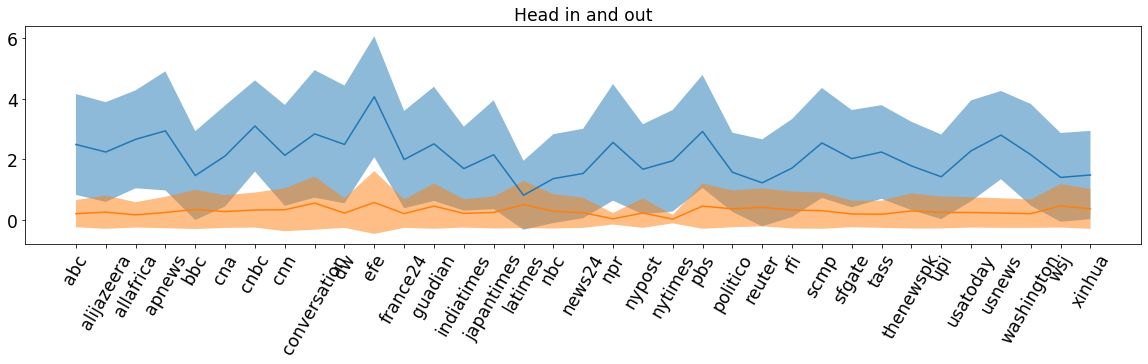

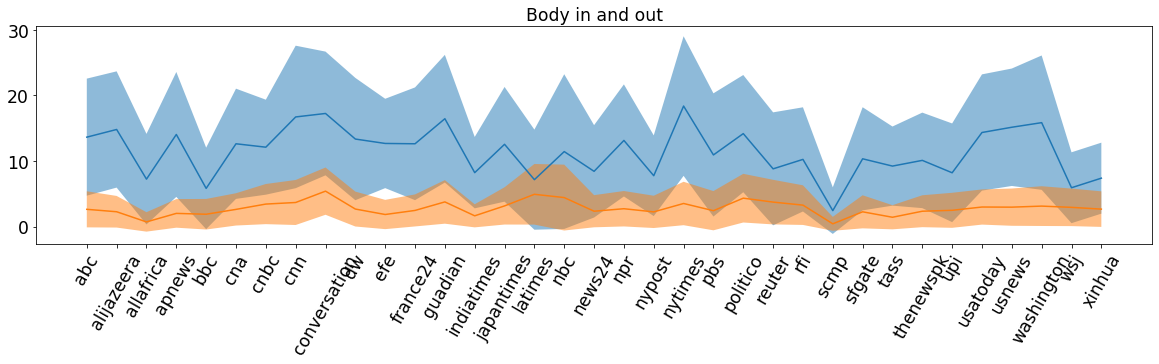

In [8]:
plt.figure()
x = list(df.source.unique())
y = df.groupby(by=["source"], dropna=False)['head_in_mean'].mean().round(2)
y1 = y +  df.groupby(by=["source"], dropna=False)['head_in_std'].mean().round(2)
y2 = y - df.groupby(by=["source"], dropna=False)['head_in_std'].mean().round(2)

_ = plt.plot(x, y)
_ = plt.fill_between(x, y1, y2, alpha=0.5)


y = df.groupby(by=["source"], dropna=False)['head_out_mean'].mean().round(2)
y1 = y +  df.groupby(by=["source"], dropna=False)['head_out_std'].mean().round(2)
y2 = y - df.groupby(by=["source"], dropna=False)['head_out_std'].mean().round(2)
_ = plt.plot(x, y)
_ = plt.fill_between(x, y1, y2, alpha=0.5)

plt.xticks(rotation=60);
plt.title('Head in and out');


plt.figure()
x = list(df.source.unique())
y = df.groupby(by=["source"], dropna=False)['body_in_mean'].mean().round(2)
y1 = y +  df.groupby(by=["source"], dropna=False)['body_in_std'].mean().round(2)
y2 = y - df.groupby(by=["source"], dropna=False)['body_in_std'].mean().round(2)

_ = plt.plot(x, y)
_ = plt.fill_between(x, y1, y2, alpha=0.5)


y = df.groupby(by=["source"], dropna=False)['body_out_mean'].mean().round(2)
y1 = y +  df.groupby(by=["source"], dropna=False)['body_out_std'].mean().round(2)
y2 = y - df.groupby(by=["source"], dropna=False)['body_out_std'].mean().round(2)
_ = plt.plot(x, y)
_ = plt.fill_between(x, y1, y2, alpha=0.5)

plt.xticks(rotation=60);
plt.title('Body in and out');

In [9]:
def select_by_threshold(filename, output_folder):
    df1 = pd.read_csv(filename, header=[0])
    sizes =[]
    sizes.append(df1.shape[0])

    if not re.search('allafrica|efe|usnews',filename):
          
#         relevant_count =\
#             df1['title_in'].apply(lambda x:len(set(eval(x)))) +\
#             df1['url_in'].apply(lambda x:len(set(eval(x)))) +\
#             df1['abs_in'].apply(lambda x:len(set(eval(x))))
        
#         irelevant_count =\
#             df1['title_out'].apply(lambda x:len(set(eval(x)))) +\
#             df1['url_out'].apply(lambda x:len(set(eval(x)))) +\
#             df1['abs_out'].apply(lambda x:len(set(eval(x))))
        
#         text_in_count = df1['text_in'].apply(lambda x:len(set(eval(x))))
#         text_out_count = df1['text_out'].apply(lambda x:len(set(eval(x))))
        
#         relevant_count  = df1['rel_count'].apply(eval).str.len()
#         irelevant_count = df1['irel_count'].apply(eval).str.len()
#         text_in_count   = df1['text_in'].apply(eval).str.len()
#         text_out_count  = df1['text_out'].apply(eval).str.len()

        head_in   = df1['head_in_count']
        head_out  = df1['head_out_count']
        body_in   = df1['body_in_count']
        body_out  = df1['body_out_count']
      
# #         remove_index =\
# #             ((head_in ==0) & ( head_out > 0)) |\
# #             ((head_in > 0) & ( head_out > 1)) |\
# #             ( body_in < 3) |\
# #             ((body_in >=3) & (body_in < 2*body_out))
        
#         remove_index =\
#             (head_out > head_in) |\
#             ((head_in > 0) & ( head_out > 1)) |\
#             ( body_in < 3) |\
#             ((body_in >=3) & (body_in < 2*body_out))
        
#         remove_index = df1[remove_index== True].index
#         sizes.append(remove_index.shape[0])
        
#         df1 = df1[~df1.index.isin(remove_index)]
#         sizes.append(df1.shape[0])

#         select_index = (head_in >= head_out) & (body_in > 1.25* body_out) & (body_in >1)
        select_index = (head_in >= head_out) & (body_in > body_out) 
        df1 = df1[select_index]
        sizes.append(df1.shape[0])
        
    else:
        print('Skip: %s'%filename)
    filename = filename.split('/')[1]
    new_filename = output_folder + '/'+ filename
    df1.to_csv(new_filename, index= False)
    print('%s:\t%s'%(new_filename, sizes))

In [10]:
pandarallel.initialize(nb_workers=35, progress_bar=False) 
_ = df['path'].parallel_apply(select_by_threshold, output_folder='step3')

INFO: Pandarallel will run on 35 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
Skip: step2b/allafrica_000.csv
step3b/latimes_019_015.csv:	[5957, 2116]step3b/latimes_020_011.csv:	[5713, 2459]

step3b/latimes_023_016.csv:	[5469, 2351]
step3b/latimes_022_004.csv:	[5490, 2499]
step3b/latimes_014_004.csv:	[6109, 2652]
step3b/latimes_021_011.csv:	[5807, 2497]
step3b/latimes_021_000.csv:	[5808, 2529]
step3b/latimes_008_012.csv:	[6333, 2917]
step3b/nypost_select_000.csv:	[9080, 6031]
step3b/latimes_000_005.csv:	[6803, 3373]step3b/latimes_010_006.csv:	[6376, 2941]

step3b/reuter_064.csv:	[7752, 4084]
step3b/latimes_007_008.csv:	[6831, 3181]
step3b/upi_filtered_news_031.csv:	[9487, 6198]
step3b/nbc_select_049.csv:	[4079, 1969]
step3b/upi_filtered_news_022.csv:	[9487, 6261]
step3b/upi_filtered_news_043.csv:	[9486, 6113]step3b/news24_select_013.csv:	[8146, 6038]step3b/bbc_2010_2021_082.csv:	[11365, 7670]


step3b/bbc_2010_2021_040.csv

step3b/rfi_select_002.csv:	[8436, 5374]
step3b/reuter_046.csv:	[7753, 4072]step3b/dw_select_004.csv:	[6499, 4941]

step3b/upi_filtered_news_001.csv:	[9487, 6170]
step3b/upi_filtered_news_155.csv:	[9486, 8440]
step3b/latimes_001_002.csv:	[6743, 3268]
step3b/latimes_008_013.csv:	[6333, 2856]
step3b/news24_select_024.csv:	[8146, 5710]
step3b/latimes_008_014.csv:	[6333, 2976]
step3b/latimes_026_005.csv:	[5461, 2112]step3b/latimes_009_010.csv:	[6374, 2787]

step3b/nbc_select_031.csv:	[4079, 2696]
step3b/bbc_2010_2021_006.csv:	[11366, 8320]
step3b/latimes_000_006.csv:	[6803, 3462]
step3b/upi_filtered_news_086.csv:	[9486, 5391]step3b/latimes_023_012.csv:	[5470, 2442]
step3b/indiatimes_036.csv:	[8867, 7683]

step3b/upi_filtered_news_012.csv:	[9487, 6020]
step3b/guadian_004.csv:	[4372, 3889]
step3b/abc_2001_2021_013.csv:	[5622, 5249]
step3b/latimes_012_005.csv:	[6107, 2504]step3b/latimes_017_004.csv:	[6423, 2488]

step3b/latimes_005_010.csv:	[6837, 3246]
step3b/washington_post_006.csv:	[4673, 4

step3b/latimes_002_012.csv:	[6760, 3217]step3b/latimes_012_009.csv:	[6107, 2704]
step3b/latimes_022_016.csv:	[5490, 2458]

step3b/latimes_028_009.csv:	[5322, 4295]
step3b/cnn_select_002.csv:	[4309, 3721]
step3b/indiatimes_034.csv:	[8867, 7689]
step3b/bbc_2010_2021_015.csv:	[11366, 7559]
step3b/latimes_013_014.csv:	[6126, 2706]
step3b/nypost_select_001.csv:	[9078, 6047]
step3b/politico_1995_2021_025.csv:	[4672, 4356]
step3b/latimes_009_005.csv:	[6375, 2827]
step3b/latimes_007_001.csv:	[6832, 3001]step3b/bbc_2010_2021_008.csv:	[11366, 7881]

step3b/nbc_select_045.csv:	[4080, 1956]
step3b/nytimes_select_053.csv:	[3988, 3855]
step3b/sfgate_004.csv:	[7014, 6176]
step3b/upi_filtered_news_016.csv:	[9487, 6242]
step3b/latimes_025_014.csv:	[5950, 2488]
step3b/latimes_018_008.csv:	[6381, 2432]
step3b/usatoday_006.csv:	[4871, 4449]
step3b/reuter_091.csv:	[7752, 5439]
step3b/thenewspk_030.csv:	[8074, 6794]
step3b/nytimes_select_045.csv:	[3988, 3701]
step3b/latimes_018_009.csv:	[6381, 2497]
step3b/

step3b/alijazeera_013.csv:	[6782, 6096]
step3b/guadian_005.csv:	[4377, 3799]
step3b/indiatimes_012.csv:	[8867, 7718]step3b/sfgate_014.csv:	[7050, 6234]

step3b/upi_filtered_news_020.csv:	[9487, 6099]
step3b/upi_filtered_news_132.csv:	[9486, 6733]
step3b/reuter_098.csv:	[7752, 4892]
step3b/nytimes_select_058.csv:	[3988, 3841]
step3b/news24_select_026.csv:	[8146, 6886]
step3b/pbs_select_004.csv:	[6747, 5220]
step3b/wsj_select_006.csv:	[13050, 10257]
step3b/latimes_007_012.csv:	[6831, 3011]
step3b/bbc_2010_2021_058.csv:	[11365, 7322]
step3b/usnews_000.csv:	[5845]
step3b/upi_filtered_news_099.csv:	[9486, 5647]
step3b/latimes_024_017.csv:	[5441, 2141]
step3b/nypost_select_022.csv:	[9076, 6796]
step3b/latimes_022_005.csv:	[5490, 2507]
step3b/upi_filtered_news_075.csv:	[9486, 5893]
step3b/bbc_2010_2021_050.csv:	[11366, 7963]
step3b/npr_select_013.csv:	[4354, 3540]
step3b/reuter_022.csv:	[7753, 4152]
step3b/conversation_007.csv:	[3380, 3092]
step3b/upi_filtered_news_044.csv:	[9486, 6085]
Skip:

# 查看结果

In [11]:
print('total size:', df['size'].sum())
df.groupby(by=["source"], dropna=False).sum()

total size: 30770.3


,size,head_in_mean,head_in_std,head_out_mean,head_out_std,body_in_mean,body_in_std,body_out_mean,body_out_std,relevant
source,,,,,,,,,,
abc,427.2,47.34,31.66,3.78,8.64,258.78,169.55,49.83,52.22,0
alijazeera,486.4,49.19,36.39,5.50,12.07,325.32,194.95,49.55,53.12,0
allafrica,56.5,5.33,3.23,0.32,0.84,14.44,13.80,1.41,2.95,2
apnews,22.9,2.94,1.97,0.24,0.52,14.03,9.52,2.00,2.18,0
bbc,1884.2,125.29,126.24,29.28,55.50,499.88,534.17,160.94,200.07,0
cna,177.0,16.85,13.39,2.14,4.34,100.89,67.19,20.88,19.69,0
cnbc,51.1,6.19,3.02,0.63,1.16,24.18,14.49,6.85,6.11,0
cnn,272.1,25.56,20.00,3.93,8.49,200.44,130.35,43.95,41.11,0
conversation,173.6,22.68,16.89,4.37,7.05,137.84,75.42,43.13,28.84,0


In [12]:
df3 = show_all_files('step3')
print('total size:', df3['size'].sum())

total size: 21230.1


In [13]:
df1 = pd.read_csv('step3b/reuter_008.csv', header=[0])
df1

,date,title,text,url,title_in,title_out,url_in,url_out,abs_in,abs_out,tag_in,tag_out,text_in,text_out,head_in_count,head_out_count,body_in_count,body_out_count
0,20100519,Thailand's ex-PM Thaksin predicts guerrilla war,"BANGKOK (Reuters) - Exiled former Thai Prime Minister Thaksin Shinawatra said on Wednesday that a military crackdown on protesters backing him could spawn mass discontent and lead to guerrilla warfare.\n\nThaksin, ousted in a bloodless 2006 military coup, is denounced by adversaries as Thailand’s most corrupt politician. To his anti-government supporters, who set Bangkok ablaze on Wednesday, he is a savior.\n\nSpeaking from an undisclosed location, Thaksin said the crackdown on “red shirt” protesters, which killed six people and wounded 58, could degenerate into widespread violence.\n\n“Th...","http://www.reuters.com/article/worldNews/idUSTRE64I5NX20100519, http://www.reuters.com/article/worldNews/idUSTRE64I5NX20100519","{'guerrilla': 1, 'war': 1}",{},{},{},"{'minister': 1, 'military': 1, 'protest': 1}",{},{},{},"{'minister': 2, 'military': 3, 'protest': 8, 'guerrilla': 2, 'warfare': 1, 'coup': 2, 'corrupt': 3, 'politician': 1, 'govern': 8, 'kill': 2, 'violen': 3, 'troop': 2, 'vote': 2, 'political': 2, 'justice': 2, 'department': 1, 'politics': 1, 'monarch': 1, 'conflict': 1, 'laws': 1, 'sentenced': 1, 'prison': 1, 'officials': 1, 'movement': 1, 'police': 4, 'electoral': 1, 'constitution': 1, 'parliament': 1, 'party': 1, 'abuse': 2, 'explode': 1, 'election': 1, 'criminal': 1, 'war': 1, 'drugs': 1, 'crime': 1, 'rights': 1, 'civil': 1, 'court': 1}","{'econom': 1, 'stock': 1, 'exchange': 1, 'funding': 1, 'invest': 1, 'dollar': 1}",5,0,39,6
1,20080103,Algeria violence death toll jumps in December,"ALGIERS, Jan 3 (Reuters) - The death toll from political violence in Algeria jumped to 56 in December from six in the previous month, bringing to 491 the number of those killed in 2007, according to a Reuters count based on newspaper reports.\n\nA total of 37 people, including 17 United Nations staff, were killed in a double suicide bombing in the capital Algiers on Dec. 11.\n\nAl Qaeda's North African wing claimed responsibility for that attack, which hit U.N. offices and a court building, saying it had targeted ""the slaves of America and France"".\n\nSix members of government forces were ...","http://www.reuters.com/article/latestCrisis/idUSAHM258436, http://www.reuters.com/article/latestCrisis/idUSAHM258436","{'violen': 1, 'death': 1}",{},{},{},"{'death': 1, 'political': 1, 'violen': 1}",{},{},{},"{'death': 1, 'political': 1, 'violen': 2, 'kill': 4, 'attack': 1, 'court': 1, 'slave': 1, 'govern': 3, 'forces': 2, 'rebel': 1, 'conflict': 2, 'military': 1, 'legislative': 1, 'election': 1, 'party': 1, 'authorities': 1, 'revolution': 1, 'bloodshed': 1, 'guerrilla': 1, 'security': 1, 'assassin': 1, 'president': 1}",{},3,0,22,0
2,20130222,UPDATE 2-Early election for Bulgaria after government quits,"UPDATE 2-Early election for Bulgaria after government quits Industry, Materials and Utilities Tsvetelia Tsolova\n\n* Main parties declined chance to form government\n\n* Bulgaria to have interim government\n\n* More protests over electricity prices planned\n\nSOFIA, Feb 22 (Reuters) - Bulgaria’s president will appoint a caretaker government ahead of a parliamentary election by mid-May after protests toppled austerity-minded Prime Minister Boiko Borisov, the president said on Friday.\n\nWednesday’s resignation by Borisov’s rightist government has failed to quell anger in the European Union’...","http://www.reuters.com/article/2013/02/22/bulgaria-government-idUSL6N0BMC5820130222, https://www.reuters.com/article/instant-article/idUSL6N0BMC5820130222","{'election': 1, 'govern': 1}",{},{'govern': 1},{},"{'election': 1, 'govern': 1, 'parties': 1}",{},{},{},"{'election': 5, 'govern': 8, 'parties': 3, 'protest': 5, 'president': 5, 'parliament': 3, 'minister': 2, 'political': 3, 'socialist': 2, 'corrupt': 1, 'reform': 2, 'dictator': 1, 'adm

# Convert to Json, remove columns

In [3]:
df3 = show_all_files('step3')
df3['json_file'] = df3['filename'].apply(lambda x: x.replace('.csv', '.json'))
df3['tar_file'] = 'result/tar/'+ df3.source+ '/'+df3.json_file+'.tar.gz'
df3.json_file = 'result/json/'+ df3.source+ '/'+df3.json_file
df3

,path,root,source,filename,size,json_file,tar_file
0,step3/abc_2001_2021_003.csv,step3,abc,abc_2001_2021_003.csv,19.9,result/json/abc/abc_2001_2021_003.json,result/tar/abc/abc_2001_2021_003.json.tar.gz
1,step3/abc_2001_2021_012.csv,step3,abc,abc_2001_2021_012.csv,17.4,result/json/abc/abc_2001_2021_012.json,result/tar/abc/abc_2001_2021_012.json.tar.gz
2,step3/abc_2001_2021_004.csv,step3,abc,abc_2001_2021_004.csv,22.7,result/json/abc/abc_2001_2021_004.json,result/tar/abc/abc_2001_2021_004.json.tar.gz
3,step3/abc_2001_2021_000.csv,step3,abc,abc_2001_2021_000.csv,31.7,result/json/abc/abc_2001_2021_000.json,result/tar/abc/abc_2001_2021_000.json.tar.gz
4,step3/abc_2001_2021_007.csv,step3,abc,abc_2001_2021_007.csv,33.9,result/json/abc/abc_2001_2021_007.json,result/tar/abc/abc_2001_2021_007.json.tar.gz
...,...,...,...,...,...,...,...
1442,step3/xinhua_005.csv,step3,xinhua,xinhua_005.csv,15.2,result/json/xinhua/xinhua_005.json,result/tar/xinhua/xinhua_005.json.tar.gz
1443,step3/xinhua_001.csv,step3,xinhua,xinhua_001.csv,17.5,result/json/xinhua/xinhua_001.json,result/tar/xinhua/xinhua_001.json.tar.gz
1444,step3/xinhua_000.csv,step3,xinhua,xinhua_000.csv,17.6,result/json/xinhua/xinhua_000.json,result/tar/xinhua/xinhua_000.json.tar.gz
1445,step3/xinhua_004.csv,step3,xinhua,xinhua_004.csv,15.1,result/json/xinhua/xinhua_004.json,result/tar/xinhua/xinhua_004.json.tar.gz


In [15]:
cwd = os.getcwd()
cwd

'/home/yibo/NEW420'

In [18]:
for i in df3.source.unique():
    try:
        os.mkdir(cwd + '/result/json/'+i)
        os.mkdir(cwd + '/result/tar/'+i) 
    except:
        print('Folder exists', end='\r')

In [19]:
drop_columns =['title_in',	'title_out',	'url_in',	'url_out',	'abs_in',	'abs_out',
               	'tag_in',	'tag_out', 'text_in',	'text_out',
               'head_in_count',	'head_out_count',	'body_in_count', 'body_out_count']

In [53]:
# filename = df3.path[0]
# json_file = df3.json_file[0]
# tar_file = df3.tar_file[0]

# df1 = pd.read_csv(filename, header=[0])
# for col in drop_columns:
#     if col in df1.columns:
#         df1 = df1.drop(columns = col)
# df1.to_json(json_file)

In [20]:
def convert_json_tar(filename, json_file, tar_file):
    df1 = pd.read_csv(filename, header=[0])
    for col in drop_columns:
        if col in df1.columns:
            df1 = df1.drop(columns = col)
            
    df1.to_json(json_file, orient="records", lines=True)
    
    with tarfile.open(tar_file, "w:gz") as tar:
        tar.add(json_file, arcname=os.path.basename(json_file))

pandarallel.initialize(nb_workers=32, progress_bar=True) 
_ = df3.parallel_apply(lambda x: convert_json_tar(x['path'], x['json_file'], x['tar_file']), axis=1)

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
pandarallel.initialize() 
df3['size'] = df3['json_file'].parallel_apply(get_csv_size)
df3

INFO: Pandarallel will run on 36 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,path,root,source,filename,size,json_file,tar_file
0,step3/abc_2001_2021_003.csv,step3,abc,abc_2001_2021_003.csv,19.1,result/json/abc/abc_2001_2021_003.json,result/tar/abc/abc_2001_2021_003.json.tar.gz
1,step3/abc_2001_2021_012.csv,step3,abc,abc_2001_2021_012.csv,16.2,result/json/abc/abc_2001_2021_012.json,result/tar/abc/abc_2001_2021_012.json.tar.gz
2,step3/abc_2001_2021_004.csv,step3,abc,abc_2001_2021_004.csv,21.6,result/json/abc/abc_2001_2021_004.json,result/tar/abc/abc_2001_2021_004.json.tar.gz
3,step3/abc_2001_2021_000.csv,step3,abc,abc_2001_2021_000.csv,30.3,result/json/abc/abc_2001_2021_000.json,result/tar/abc/abc_2001_2021_000.json.tar.gz
4,step3/abc_2001_2021_007.csv,step3,abc,abc_2001_2021_007.csv,32.5,result/json/abc/abc_2001_2021_007.json,result/tar/abc/abc_2001_2021_007.json.tar.gz
...,...,...,...,...,...,...,...
1442,step3/xinhua_005.csv,step3,xinhua,xinhua_005.csv,13.9,result/json/xinhua/xinhua_005.json,result/tar/xinhua/xinhua_005.json.tar.gz
1443,step3/xinhua_001.csv,step3,xinhua,xinhua_001.csv,16.1,result/json/xinhua/xinhua_001.json,result/tar/xinhua/xinhua_001.json.tar.gz
1444,step3/xinhua_000.csv,step3,xinhua,xinhua_000.csv,16.1,result/json/xinhua/xinhua_000.json,result/tar/xinhua/xinhua_000.json.tar.gz
1445,step3/xinhua_004.csv,step3,xinhua,xinhua_004.csv,13.9,result/json/xinhua/xinhua_004.json,result/tar/xinhua/xinhua_004.json.tar.gz


In [5]:
print(df3['size'].sum())
df3.groupby(by=["source"], dropna=False)['size'].sum().round(1)

20792.6


source
abc              378.3
alijazeera       415.3
allafrica         49.9
apnews            20.4
bbc             1271.8
cna              141.0
cnbc              43.1
cnn              230.4
conversation     135.3
dw               332.1
efe               37.5
france24         180.3
guadian          473.4
indiatimes       684.6
japantimes        73.4
latimes         4611.9
nbc             1166.2
news24           544.0
npr              368.5
nypost           723.5
nytimes         1253.0
pbs              164.8
politico         466.0
reuter          1301.7
rfi              130.4
scmp               8.9
sfgate           954.5
tass              27.9
thenewspk        541.3
upi             2863.6
usatoday         223.0
usnews           154.0
washington       568.7
wsj              103.5
xinhua           150.4
Name: size, dtype: float64

In [22]:
print(df3['size'].sum())
df3.groupby(by=["source"], dropna=False)['size'].sum().round(1)

20145.7


source
abc              378.3
alijazeera       415.3
allafrica         49.9
apnews            20.4
bbc             1271.8
cna              141.0
cnbc              43.1
cnn              230.4
conversation     135.3
dw               332.1
efe               37.5
france24         180.3
guadian          473.4
indiatimes       684.6
japantimes        73.4
latimes         4611.9
nbc             1166.2
news24           544.0
npr              368.5
nypost           723.5
nytimes         1253.0
pbs              164.8
politico         466.0
reuter          1301.7
rfi              130.4
scmp               8.9
sfgate           354.2
tass              27.9
thenewspk        541.3
upi             2863.6
usatoday         223.0
usnews           154.0
washington       522.1
wsj              103.5
xinhua           150.4
Name: size, dtype: float64